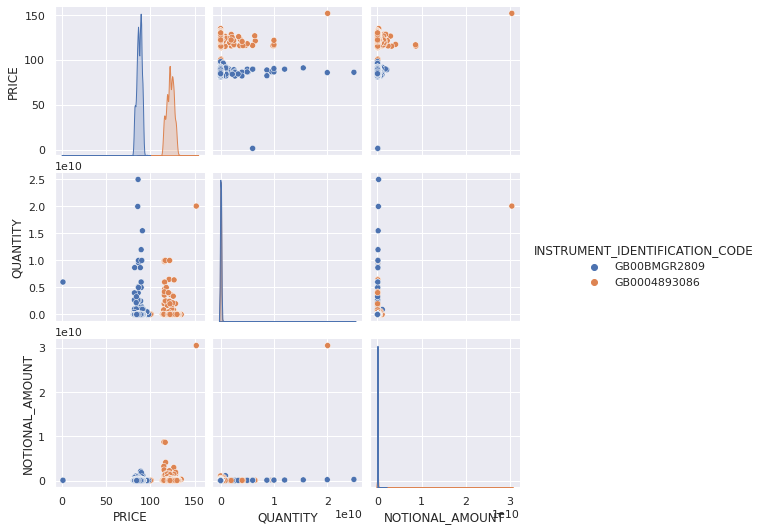

In [1]:
## Find the relationship between data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
df = pd.read_csv('AutoencoderData.csv')
#df=df.sample(2)
df=df.loc[df['INSTRUMENT_IDENTIFICATION_CODE'].isin(['GB0004893086','GB00BMGR2809'])]
#df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB0004893086','GB00BMGR2809']
df=df[['PRICE','QUANTITY','NOTIONAL_AMOUNT','INSTRUMENT_IDENTIFICATION_CODE']]
sns.pairplot(df,hue='INSTRUMENT_IDENTIFICATION_CODE')
plt.show()


In [2]:
##Create the following transformations for quantity in all the datasets - log  and create the price difference for price

In [3]:

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import datetime
# import plotnine as p9
# import matplotlib.dates as mdates
# # Import data
# df1 = pd.read_csv('autoencoders_results.csv')
# df1['LOG_QUANTITY'] = np.log(df1['QUANTITY']+3)
# df1['LOG_QUANTITY']= np.log(df1['LOG_QUANTITY']).replace([np.inf, -np.inf], 0)
# df1['PRICE_DIFF'] = df1['PRICE'] - df1['PRICE'].shift(1)
# df1.drop(['is_anomaly'], axis=1, inplace=True)
# df1.drop(['mean_squared_error'], axis=1, inplace=True)
# df1.drop(['Anomaly_Type'], axis=1, inplace=True)
# df1.to_csv('autoencoders_results_t.csv', index=False)

# df2 = pd.read_csv('arima_plus_training_results.csv')
# df2['LOG_QUANTITY'] = np.log(df2['QUANTITY']+3)
# df1['LOG_QUANTITY']= np.log(df1['LOG_QUANTITY']).replace([np.inf, -np.inf], 0)
# df2['PRICE_DIFF'] = df2['PRICE'] - df2['PRICE'].shift(1)
# df2.drop(['is_anomaly'], axis=1, inplace=True)
# df2.drop(['normalized_distance'], axis=1, inplace=True)
# df2.drop(['CENTROID_ID'], axis=1, inplace=True)
# df2.to_csv('arima_plus_training_results_t.csv', index=False)

# df3 = pd.read_csv('kmeans_results.csv')
# df3['LOG_QUANTITY'] = np.log(df3['QUANTITY']+3)
# df1['LOG_QUANTITY']= np.log(df1['LOG_QUANTITY']).replace([np.inf, -np.inf], 0)
# df3['PRICE_DIFF'] = df3['PRICE'] - df3['PRICE'].shift(1)
# df3.drop(['is_anomaly'], axis=1, inplace=True)
# df3.drop(['normalized_distance'], axis=1, inplace=True)
# df3.drop(['CENTROID_ID'], axis=1, inplace=True)
# df3.to_csv('kmeans_results_t.csv', index=False)

# df4 = pd.read_csv('arima_plus_training_results_qty.csv')
# df4['LOG_QUANTITY'] = np.log(df4['QUANTITY']+3)
# df1['LOG_QUANTITY']= np.log(df1['LOG_QUANTITY']).replace([np.inf, -np.inf], 0)
# df4['PRICE_DIFF'] = df4['PRICE'] - df4['PRICE'].shift(1)
# df4.drop(['is_anomaly'], axis=1, inplace=True)
# df4.drop(['Anomaly_Type'], axis=1, inplace=True)
# df4.to_csv('arima_plus_training_results_qty_t.csv', index=False)


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


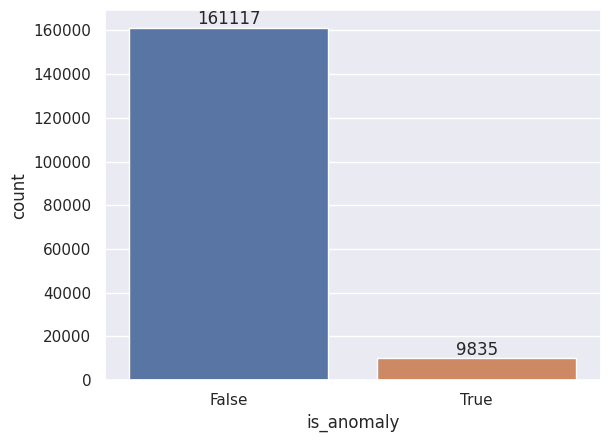

In [102]:
## Auto Encoder Data   1st Bond selected GB0004893086

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotnine as p9
import matplotlib.dates as mdates

# Import data
df = pd.read_csv('autoencoders_results_t.csv')
ax=sns.countplot(df['is_anomaly'])

#df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-01-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-02-28')]



ax.bar_label(ax.containers[0])
df['Anomaly_Type'] = df['Anomaly_Type'].fillna('Not')

In [103]:
# Visualize the autoencoders data with no segment for one bond

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB00BJMHB534']
df['date'] = pd.to_datetime(df['POST_TRADE_DATE_AND_TIME'])
df = df.sort_values(by='POST_TRADE_DATE_AND_TIME')

df1=df[df['is_anomaly'] ==True]
df1['date'] = pd.to_datetime(df1['POST_TRADE_DATE_AND_TIME'])
df1 = df1.sort_values(by='POST_TRADE_DATE_AND_TIME')

#df1
#print(df.tail())

/tmp/ipykernel_267/3568141485.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


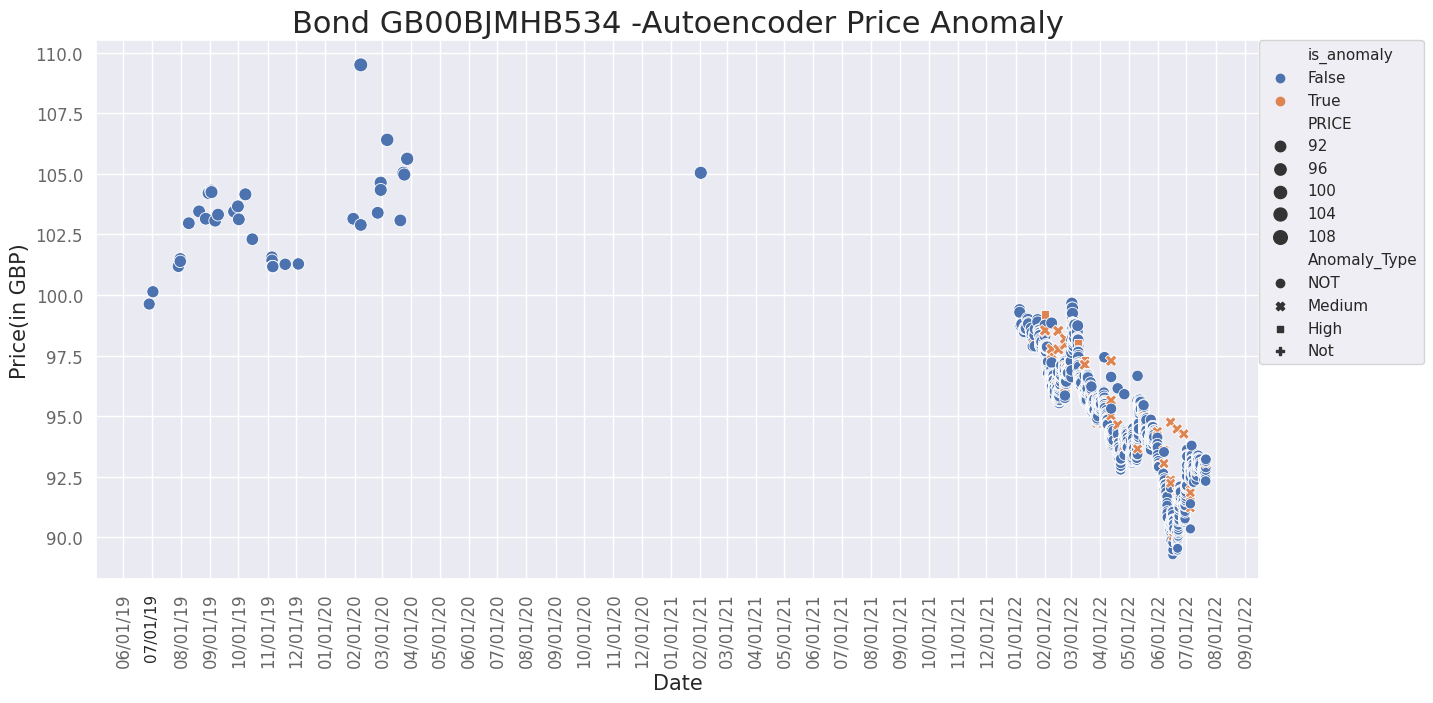

In [104]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price(in GBP)', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
sns.set(style="darkgrid")
#g = sns.relplot(x="date", y="PRICE", kind="line", data=df4
sns.scatterplot(x='date', y='PRICE', data=df, hue='is_anomaly',size='PRICE',style='Anomaly_Type',legend='brief',sizes=(50, 100))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='PRICE', color='is_anomaly')) + p9.geom_point(size=0.5)
plt.title('Bond GB00BJMHB534 -Autoencoder Price Anomaly',fontsize=22)

plt.show()

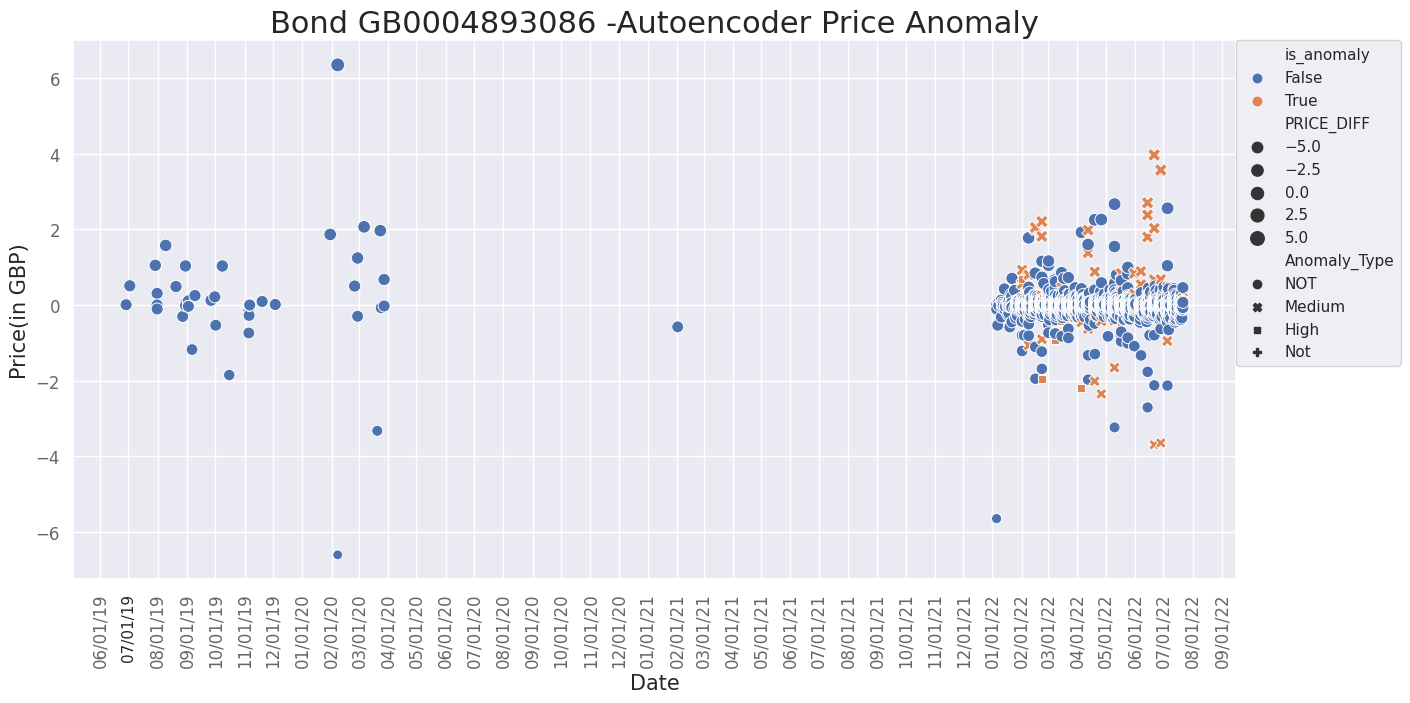

In [105]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price(in GBP)', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
sns.set(style="darkgrid")
#g = sns.relplot(x="date", y="PRICE", kind="line", data=df4
sns.scatterplot(x='date', y='PRICE_DIFF', data=df, hue='is_anomaly',size='PRICE_DIFF',style='Anomaly_Type',legend='brief',sizes=(50, 100))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='PRICE', color='is_anomaly')) + p9.geom_point(size=0.5)
plt.title('Bond GB0004893086 -Autoencoder Price Anomaly',fontsize=22)

plt.show()

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log


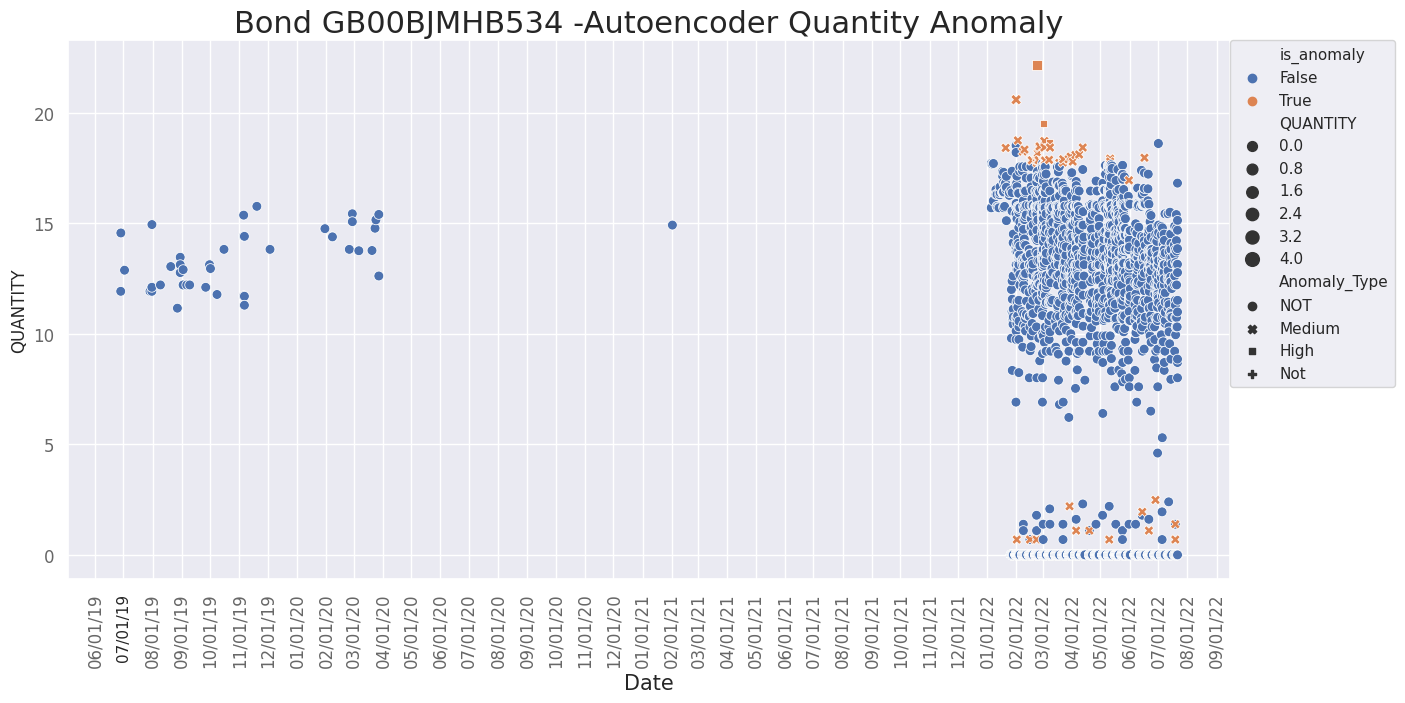

In [111]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
#sns.set(style="whitegrid")
plt.title('Bond GB00BJMHB534 -Autoencoder Quantity Anomaly',fontsize=22)
sns.set(style="darkgrid")
sns.scatterplot(x='date', y=np.log(df['QUANTITY']), data=df, hue='is_anomaly',size='QUANTITY',style='Anomaly_Type',legend='brief',sizes=(50, 100))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()


Text(0.5, 0, 'Quantity (Distribution for Bond GB0004893086) ')

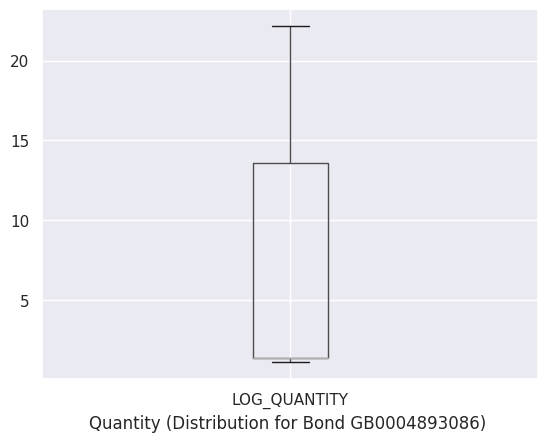

In [107]:
#sns.distplot(df['QUANTITY'])
plt.ticklabel_format(style='plain', axis='y')
df.boxplot(column='LOG_QUANTITY')
plt.xlabel('Quantity (Distribution for Bond GB0004893086) ', fontsize=12)

<AxesSubplot:>

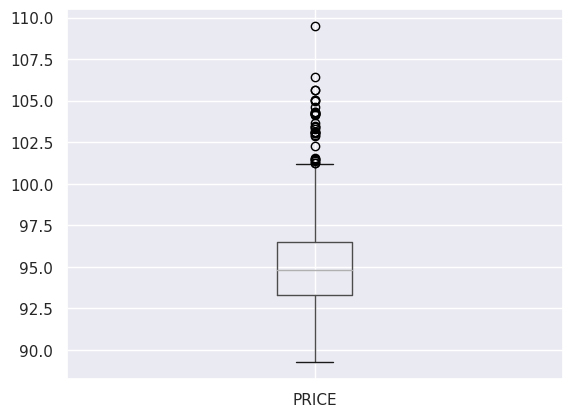

In [108]:
#sns.distplot(df['QUANTITY'])
plt.ticklabel_format(style='plain', axis='y')
df.boxplot(column='PRICE')

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'Log Quantity (Distribution for Bond GB0004893086) ')

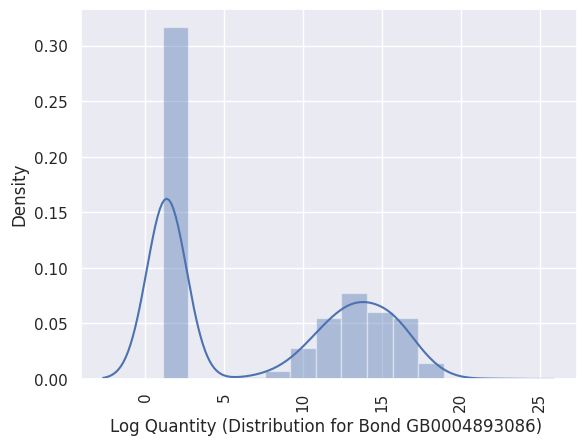

In [109]:
##Visualization of the quantity distribution
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
sns.distplot(df['LOG_QUANTITY'])
plt.xlabel('Log Quantity (Distribution for Bond GB0004893086) ', fontsize=12)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'PRICE Difference (Distribution for Bond GB0004893086) ')

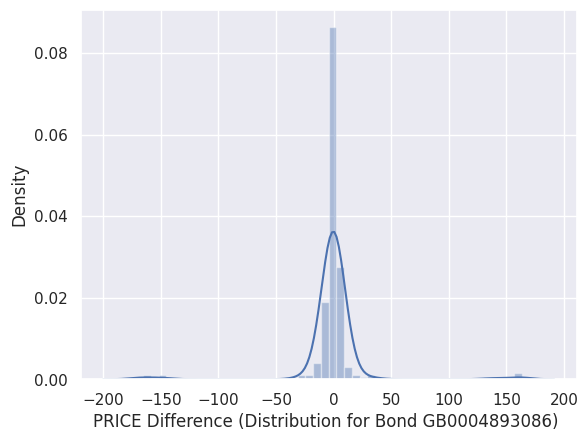

In [12]:
sns.distplot(df['PRICE_DIFF'])
plt.xlabel('PRICE Difference (Distribution for Bond GB0004893086) ', fontsize=12)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'PRICE Distribution for Bond GB0004893086) ')

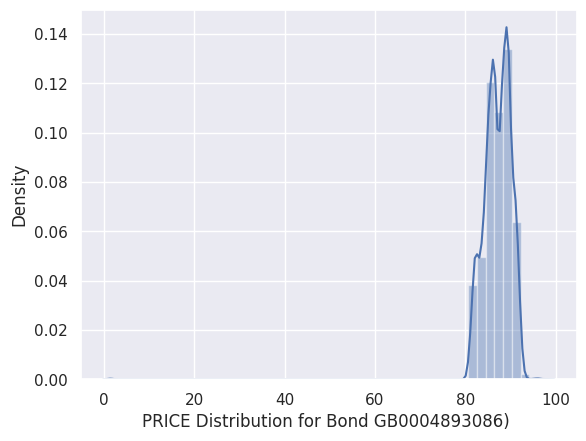

In [70]:
sns.distplot(df['PRICE'])
plt.xlabel('PRICE Distribution for Bond GB0004893086) ', fontsize=12)

In [14]:
## 2nd Bond Selected ## Auto Encoder Data   Bond selected GB0008932666

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates

# Import data
df = pd.read_csv('autoencoders_results_t.csv')
#df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-02-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-03-31')]
df['Anomaly_Type'] = df['Anomaly_Type'].fillna('Not')

In [15]:
# Visualize the data with  for one bond

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB00BMGR2809'] ##GB0008932666  GB00B00NY175
df['date'] = pd.to_datetime(df['POST_TRADE_DATE_AND_TIME'])
df = df.sort_values(by='POST_TRADE_DATE_AND_TIME')

df1=df[df['is_anomaly'] ==True]
df1['date'] = pd.to_datetime(df1['POST_TRADE_DATE_AND_TIME'])
df1 = df1.sort_values(by='POST_TRADE_DATE_AND_TIME')


/tmp/ipykernel_267/411281828.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


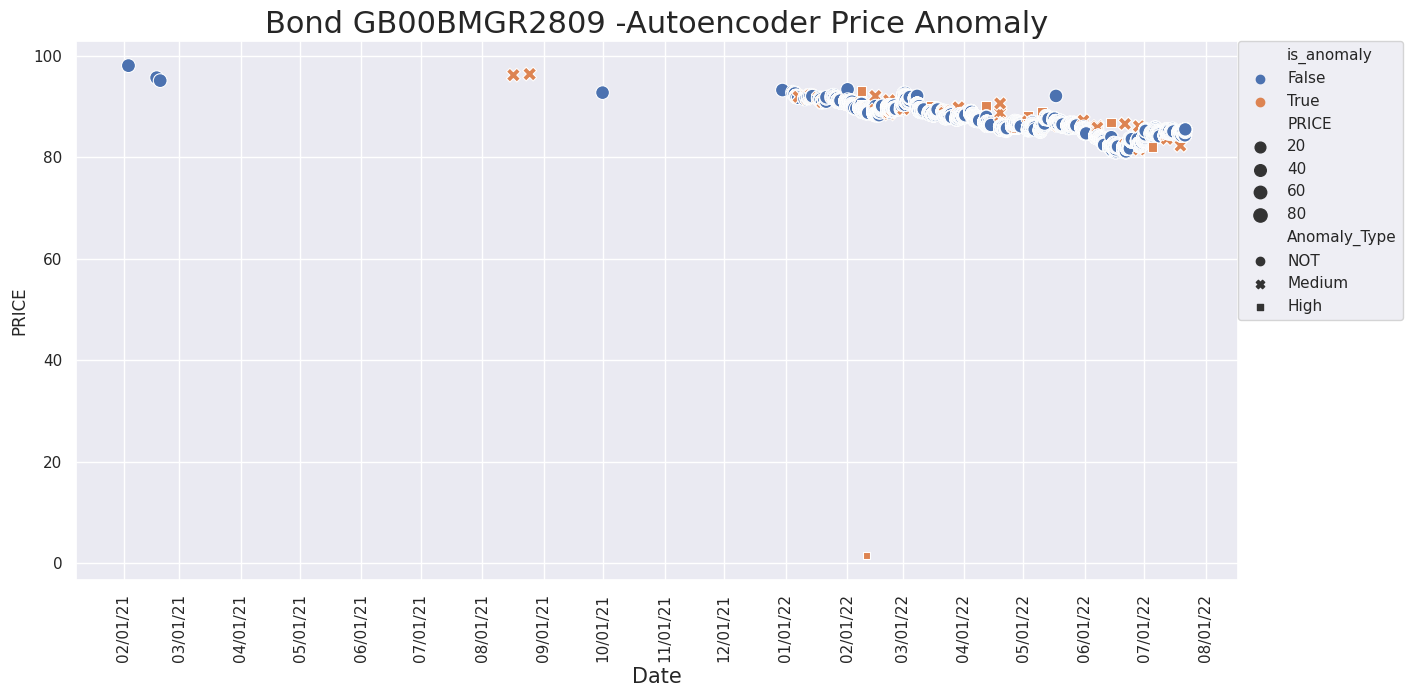

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
plt.xlabel('Date', fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.title('Bond GB00BMGR2809 -Autoencoder Price Anomaly',fontsize=22)
sns.scatterplot(x='date', y='PRICE', data=df, hue='is_anomaly',size='PRICE',style='Anomaly_Type',legend='brief',sizes=(50, 100))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='QUANTITY', color='is_anomaly')) + p9.geom_point(size=0.5)

plt.show()

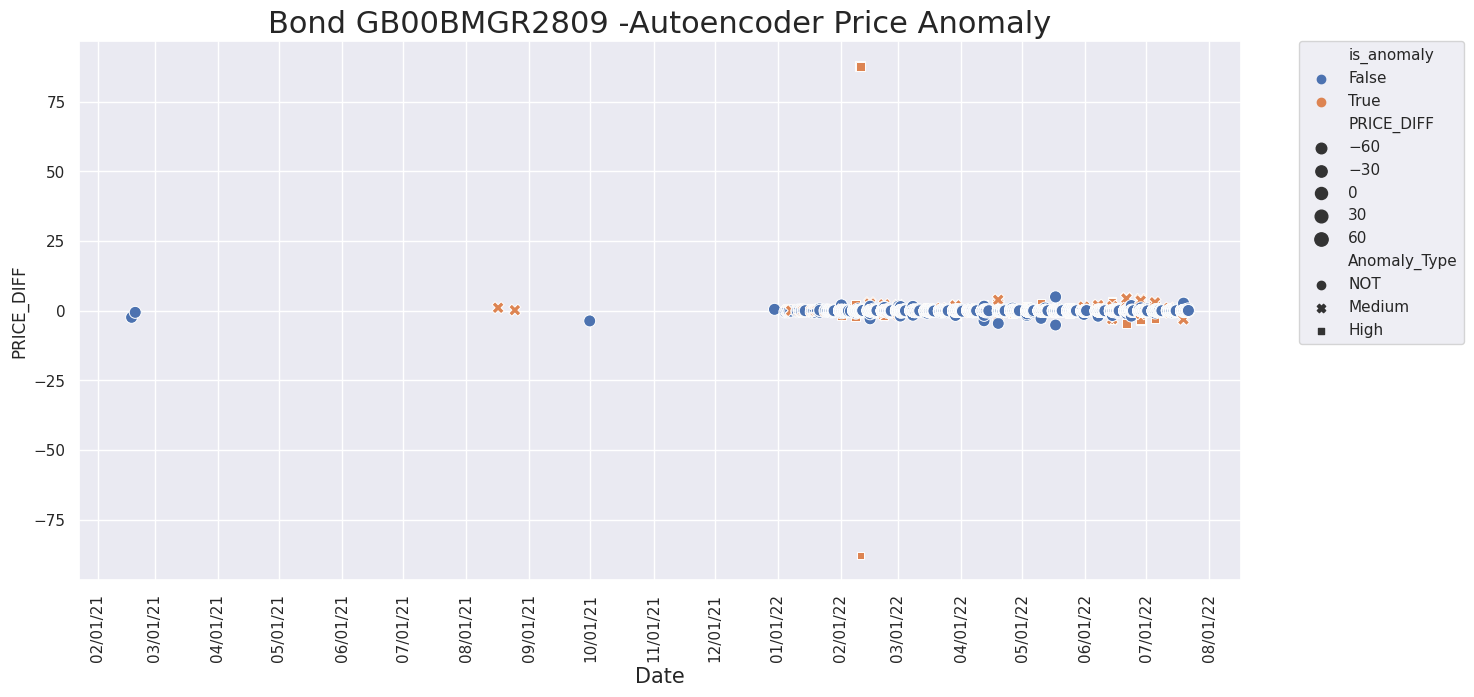

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
plt.xlabel('Date', fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.title('Bond GB00BMGR2809 -Autoencoder Price Anomaly',fontsize=22)
sns.scatterplot(x='date', y='PRICE_DIFF', data=df, hue='is_anomaly',size='PRICE_DIFF',style='Anomaly_Type',legend='brief',sizes=(50, 100))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='QUANTITY', color='is_anomaly')) + p9.geom_point(size=0.5)

plt.show()

Text(0.5, 0, 'Quantity (Distribution for Bond GB00BMGR2809) ')

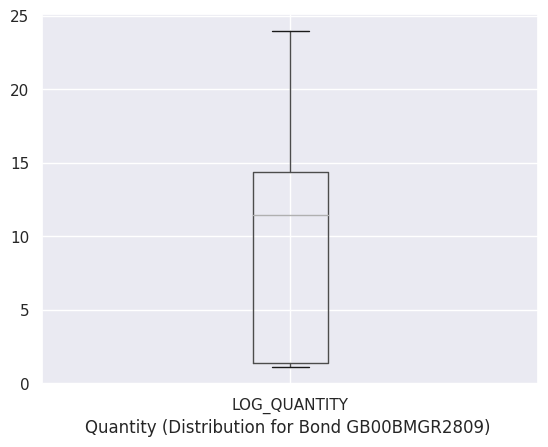

In [18]:
#sns.distplot(df['QUANTITY'])
plt.ticklabel_format(style='plain', axis='y')
df.boxplot(column='LOG_QUANTITY')
plt.xlabel('Quantity (Distribution for Bond GB00BMGR2809) ', fontsize=12)

<AxesSubplot:>

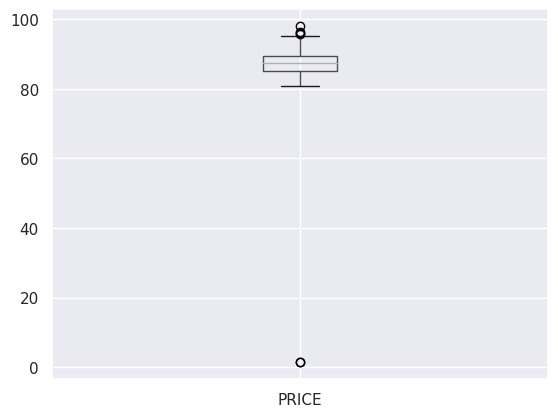

In [19]:
#sns.distplot(df['QUANTITY'])
plt.ticklabel_format(style='plain', axis='y')
df.boxplot(column='PRICE')

In [20]:
## 2nd Bond Selected ## Auto Encoder Data   Bond selected GB00BMGR2809

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates

# Import data
df = pd.read_csv('autoencoders_results_t.csv')
#df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-02-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-03-31')]


In [21]:
# Visualize the data with  for one bond

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB00BMGR2809']
df['date'] = pd.to_datetime(df['POST_TRADE_DATE_AND_TIME'])
df = df.sort_values(by='POST_TRADE_DATE_AND_TIME')

df1=df[df['is_anomaly'] ==True]
df1['date'] = pd.to_datetime(df1['POST_TRADE_DATE_AND_TIME'])
df1 = df1.sort_values(by='POST_TRADE_DATE_AND_TIME')


#print(df['is_anomaly'].count())


/tmp/ipykernel_267/1014853400.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


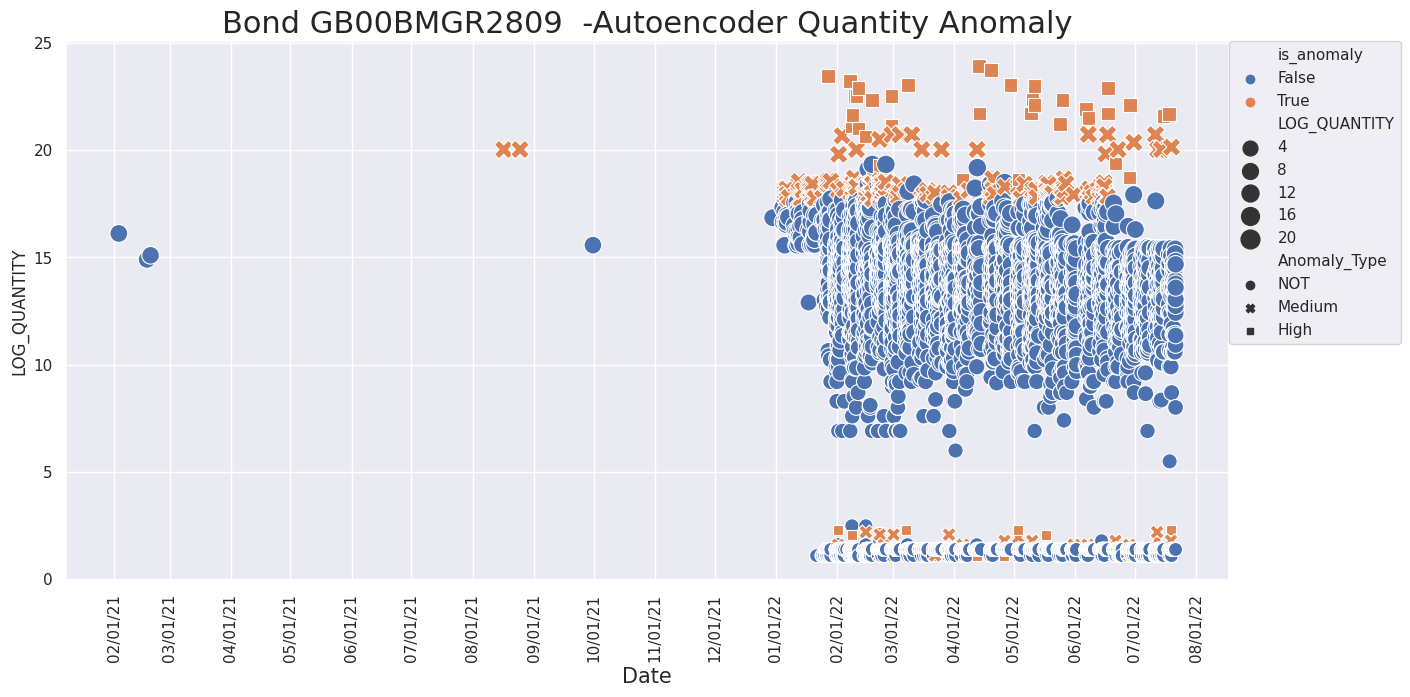

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
plt.xlabel('Date', fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.title('Bond GB00BMGR2809  -Autoencoder Quantity Anomaly',fontsize=22)
sns.scatterplot(x='date', y='LOG_QUANTITY', data=df, hue='is_anomaly',size='LOG_QUANTITY',style='Anomaly_Type',legend='brief',sizes=(100, 200))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='QUANTITY', color='is_anomaly')) + p9.geom_point(size=0.5)

plt.show()

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'Quantity (Distribution for Bond GB00BMGR2809) ')

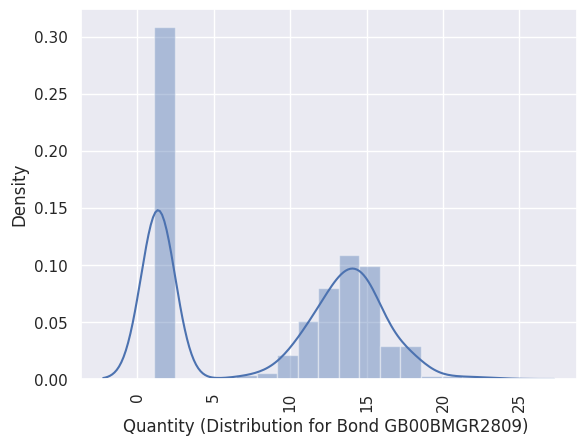

In [23]:
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
sns.distplot(df['LOG_QUANTITY'])
plt.xlabel('Quantity (Distribution for Bond GB00BMGR2809) ', fontsize=12)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='PRICE_DIFF', ylabel='Density'>

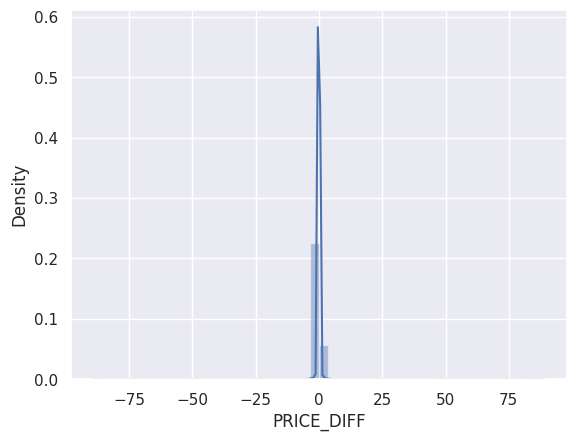

In [24]:
sns.distplot(df['PRICE_DIFF'])

In [25]:

####Visualizations from Time Series Model

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


[Text(0, 0, '120052'), Text(0, 0, '5')]

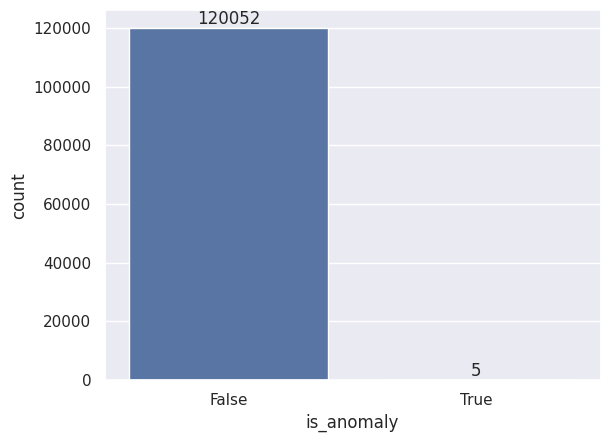

In [26]:
##Training data for price

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotnine as p9
import matplotlib.dates as mdates

# Import data
df = pd.read_csv('arima_plus_training_results.csv')

ax=sns.countplot(df['is_anomaly'])
df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-05-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-06-30')]
df['Anomaly_Type'] = df['Anomaly_Type'].fillna('Not')


ax.bar_label(ax.containers[0])


In [27]:
# Visualize the time series data with  for one bond

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB00BP1W7G45']
df['date'] = pd.to_datetime(df['POST_TRADE_DATE_AND_TIME'])
df = df.sort_values(by='date')

df1=df[df['is_anomaly'] ==True]
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.sort_values(by='date')


/tmp/ipykernel_267/3976864344.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


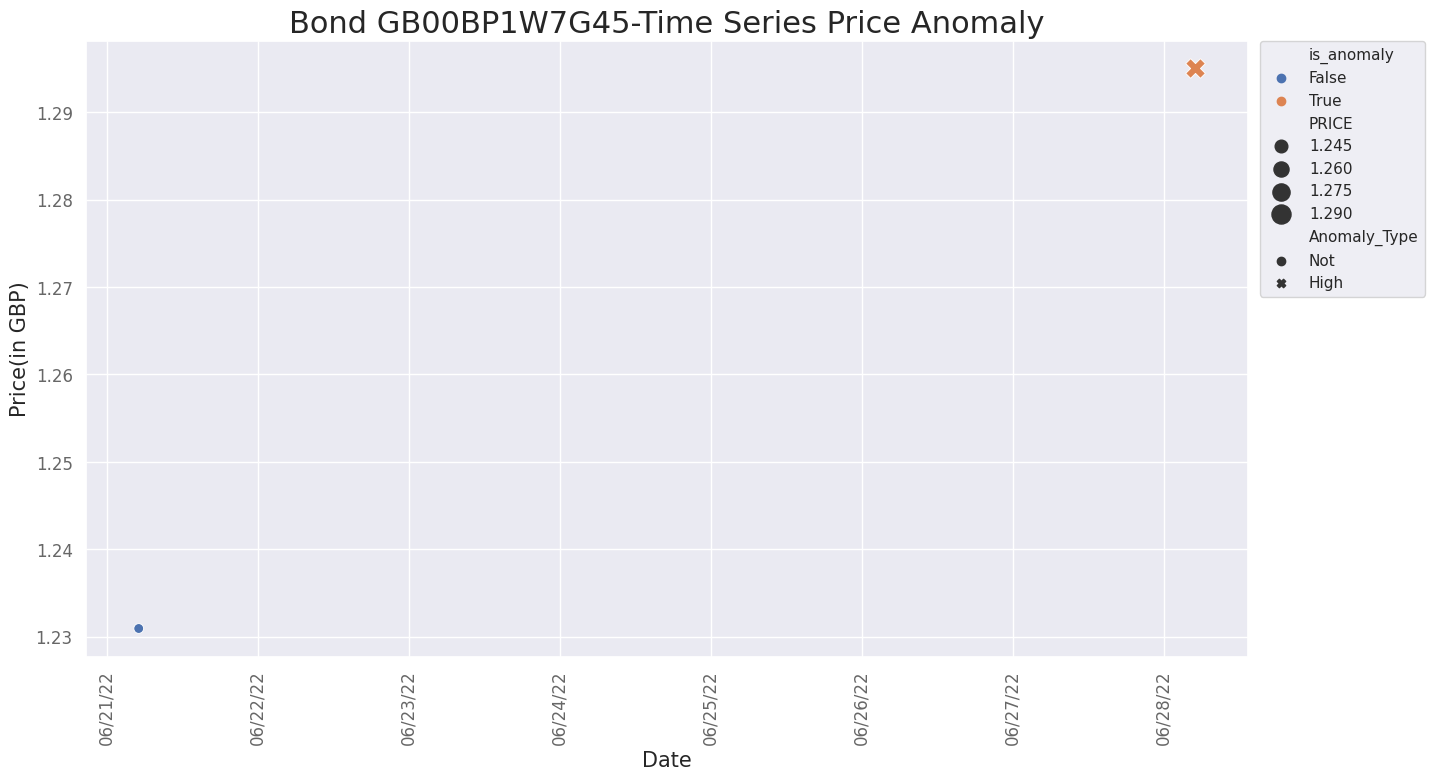

In [28]:
fig, ax = plt.subplots(figsize=(15,8))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price(in GBP)', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
sns.set(style="darkgrid")
#g = sns.relplot(x="date", y="PRICE", kind="line", data=df)
sns.scatterplot(x='date', y='PRICE', data=df, hue='is_anomaly',size='PRICE',style='Anomaly_Type',legend='brief',sizes=(50, 200))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='PRICE', color='is_anomaly')) + p9.geom_point(size=0.5)
plt.title('Bond GB00BP1W7G45-Time Series Price Anomaly',fontsize=22)

plt.show()

In [29]:
##Training data for Quantity

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotnine as p9
import matplotlib.dates as mdates

# Import dat
df = pd.read_csv('arima_plus_training_results_qty.csv')
df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-01-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-06-28')]
df['Anomaly_Type'] = df['Anomaly_Type'].fillna('Not')


In [31]:
# Visualize the time series data with no segment for one bond

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB00BP1W0B05']
df['date'] = pd.to_datetime(df['POST_TRADE_DATE_AND_TIME'])
df = df.sort_values(by='date')

df1=df[df['is_anomaly'] ==True]
df1['date'] = pd.to_datetime(df1['POST_TRADE_DATE_AND_TIME'])
df1 = df1.sort_values(by='date')
df

/tmp/ipykernel_267/2143200626.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


is_anomaly Anomaly_Type     POST_TRADE_DATE_AND_TIME  \
5978         False          Not      2022-03-29 05:03:35 UTC   
5147         False          Not      2022-04-12 05:03:38 UTC   
6038         False          Not      2022-05-17 05:03:58 UTC   
7431         False          Not      2022-05-31 05:04:00 UTC   
112118        True         High      2022-06-10 07:14:48 UTC   
9163         False          Not      2022-06-14 05:03:22 UTC   
90200        False          Not  2022-06-21 08:11:16.814 UTC   

       INSTRUMENT_IDENTIFICATION_CODE      PRICE VENUE_OF_EXECUTION  \
5978                     GB00BP1W0B05   0.759188               TREU   
5147                     GB00BP1W0B05   0.606362               TREU   
6038                     GB00BP1W0B05   0.988221               TREU   
7431                     GB00BP1W0B05   0.905263               TREU   
112118                   GB00BP1W0B05  99.754358               XOFF   
9163                     GB00BP1W0B05   1.018851               TWEM   
90200                    GB00BP1W0B05  99.764256               XOFF   

       PRICE_NOTATION PRICE_CURRENCY VENUE_OF_PUBLICATION  \
5978             YIEL            EUR                 TREU   
5147             YIEL            EUR                 TREU   
6038             YIEL            EUR                 TREU   
7431             YIEL            EUR                 TREU   
112118           PERC            GBP                 TRNL   
9163             YIEL            EUR                 TWEM   
90200            PERC            GBP                 TRNL   

       TRANSACTION_IDENTIFICATION_CODE  QUANTITY  NOTIONAL_AMOUNT  \
5978              '7208266290304123889         0     6.593040e+07   
5147              '7208281683466912835         0     3.071848e+07   
6038              '7208320166373885022         0     2.903794e+07   
7431              '7208335559536673757         0     1.130576e+07   
112118             2206141755000441956   3820000     3.820000e+06   
9163              '7208350952699462365         0     7.557119e+06   
90200              2206231755010244113    570000     5.700000e+05   

       NOTIONAL_CURRENCY       PUBLICATION_DATE_AND_TIME   IDAF  \
5978                 EUR         2022-03-29 05:03:35 UTC   True   
5147                 EUR         2022-04-12 05:03:38 UTC   True   
6038                 EUR         2022-05-17 05:03:58 UTC   True   
7431                 EUR         2022-05-31 05:04:00 UTC   True   
112118               GBP  2022-06-14 16:55:00.750666 UTC  False   
9163                 EUR         2022-06-14 05:03:22 UTC   True   
90200                GBP  2022-06-23 16:55:01.025261 UTC  False   

                                   date  
5978          2022-03-29 05:03:35+00:00  
5147          2022-04-12 05:03:38+00:00  
6038          2022-05-17 05:03:58+00:00  
7431          2022-05-31 05:04:00+00:00  
112118        2022-06-10 07:14:48+00:00  
9163          2022-06-14 05:03:22+00:00  
90200  2022-06-21 08:11:16.814000+00:00

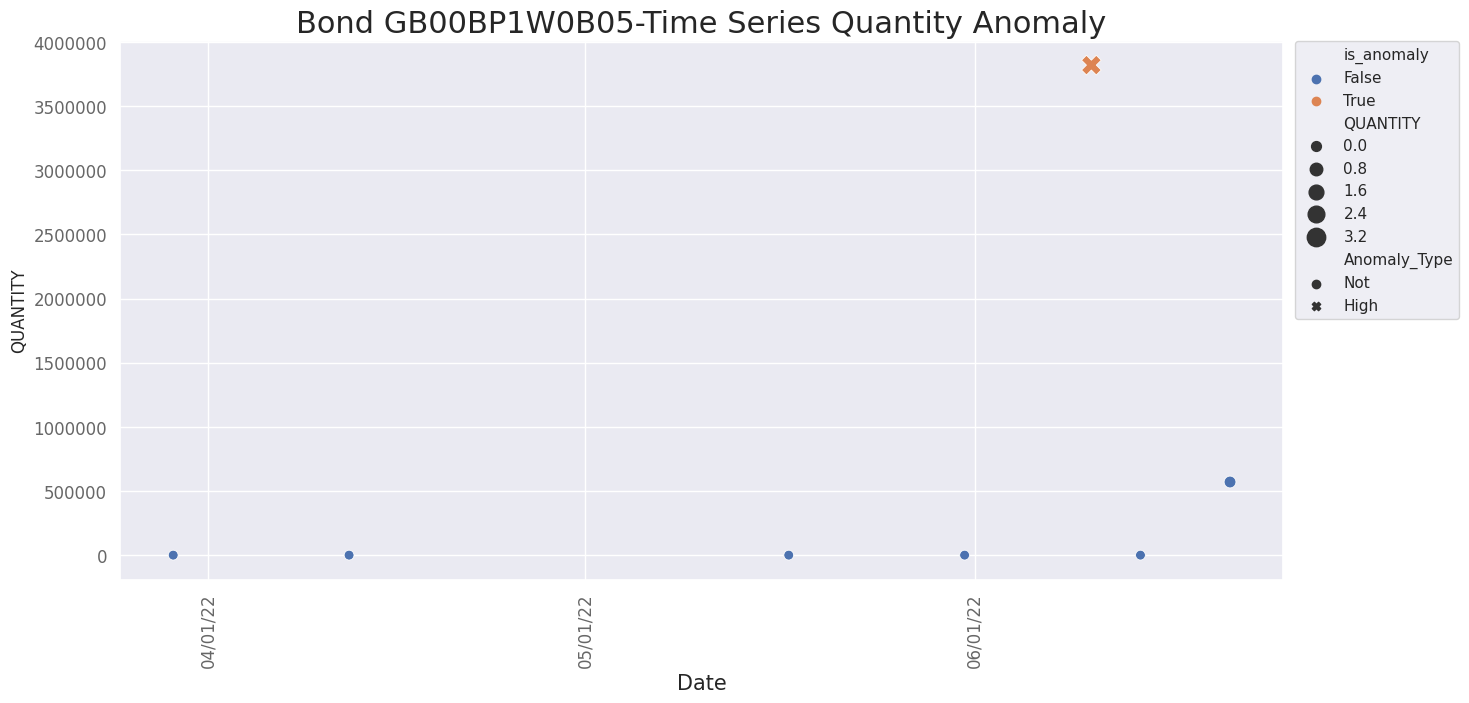

In [32]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
plt.xlabel('Date', fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.title('Bond GB00BP1W0B05-Time Series Quantity Anomaly',fontsize=22)
sns.scatterplot(x='date', y='QUANTITY', data=df, hue='is_anomaly',size='QUANTITY' ,style='Anomaly_Type',legend='brief',sizes=(50, 200))
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='QUANTITY', color='is_anomaly')) + p9.geom_point(size=0.5)

plt.show()

In [33]:

####Visualizations from k-means Model

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


[Text(0, 0, '113872'), Text(0, 0, '2331')]

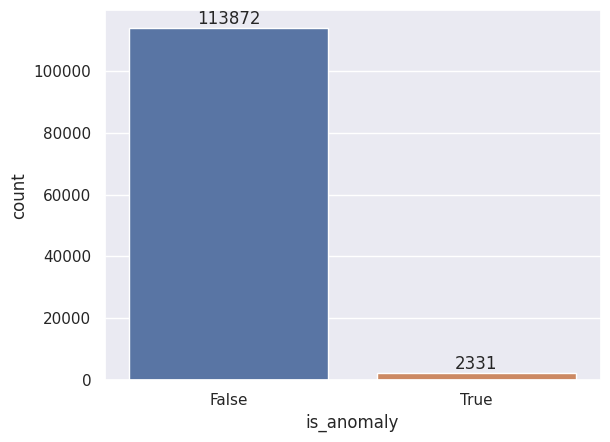

In [78]:
##Training data for price

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotnine as p9
import matplotlib.dates as mdates

# Import data
df = pd.read_csv('kmeans_results_t.csv')

ax=sns.countplot(df['is_anomaly'])
#df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-05-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-06-30')]
#df['is_anomaly'] = df['is_anomaly'].fillna('Not')


ax.bar_label(ax.containers[0])



In [79]:
# Visualize the k-means data for one bond

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB00BJMHB534']
df['date'] = pd.to_datetime(df['POST_TRADE_DATE_AND_TIME'])
df = df.sort_values(by='date')

df1=df[df['is_anomaly'] ==True]
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.sort_values(by='date')




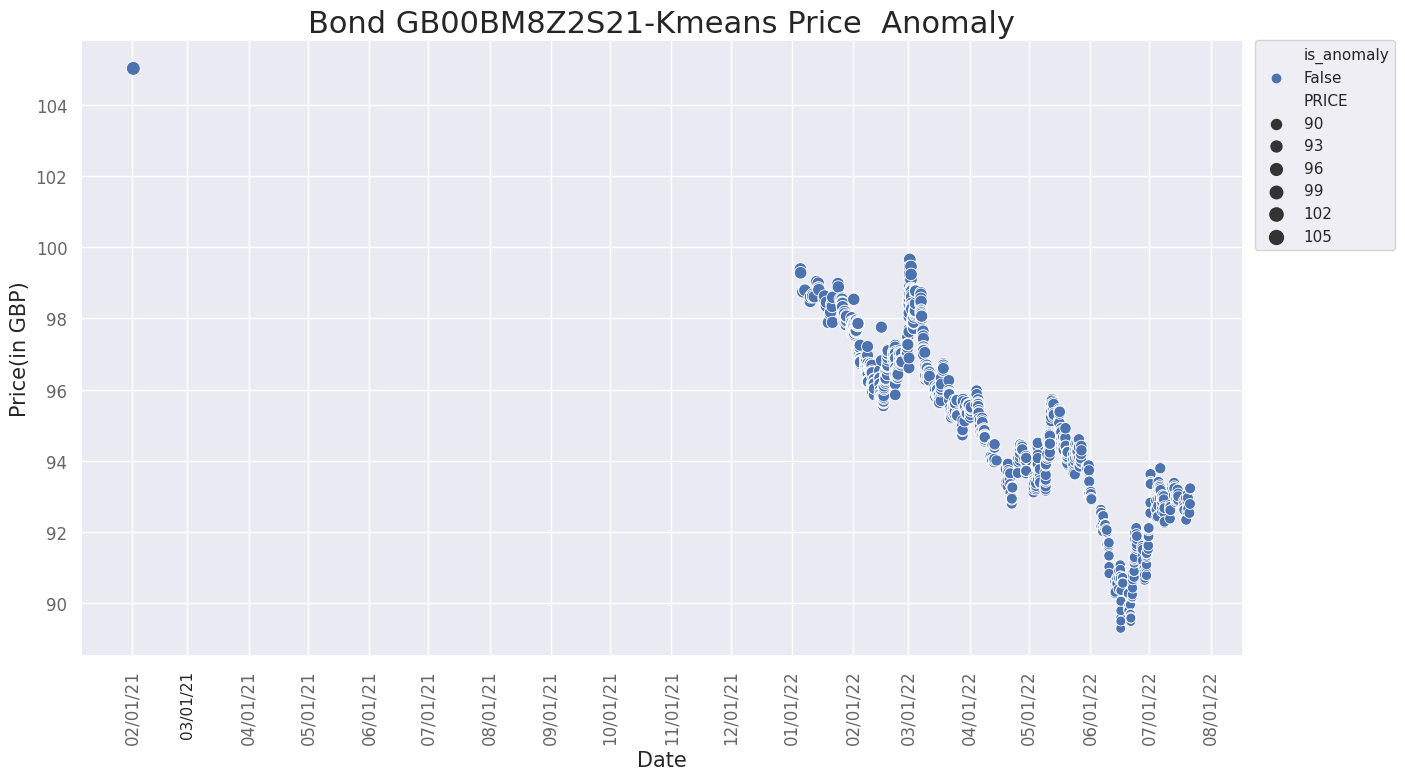

In [80]:
fig, ax = plt.subplots(figsize=(15,8))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price(in GBP)', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
sns.set(style="darkgrid")
#g = sns.relplot(x="date", y="PRICE", kind="line", data=df)
sns.scatterplot(x='date', y='PRICE', data=df, hue='is_anomaly',size='PRICE',legend='brief',sizes=(50, 100))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='PRICE', color='is_anomaly')) + p9.geom_point(size=0.5)
plt.title('Bond GB00BM8Z2S21-Kmeans Price  Anomaly',fontsize=22)

plt.show()

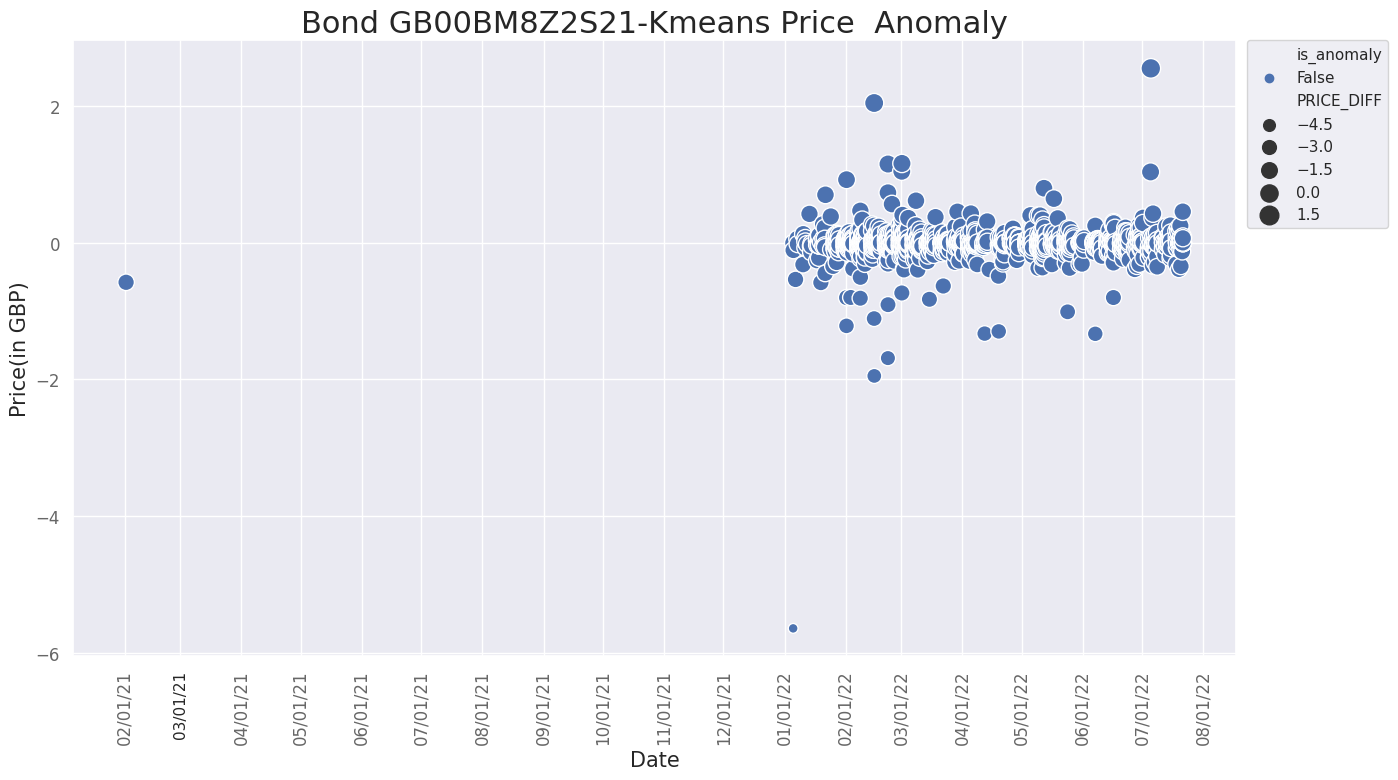

In [81]:
fig, ax = plt.subplots(figsize=(15,8))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price(in GBP)', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
sns.set(style="darkgrid")
#g = sns.relplot(x="date", y="PRICE", kind="line", data=df)
sns.scatterplot(x='date', y='PRICE_DIFF', data=df, hue='is_anomaly',size='PRICE_DIFF',legend='brief',sizes=(50, 200))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='PRICE', color='is_anomaly')) + p9.geom_point(size=0.5)
plt.title('Bond GB00BM8Z2S21-Kmeans Price  Anomaly',fontsize=22)

plt.show()

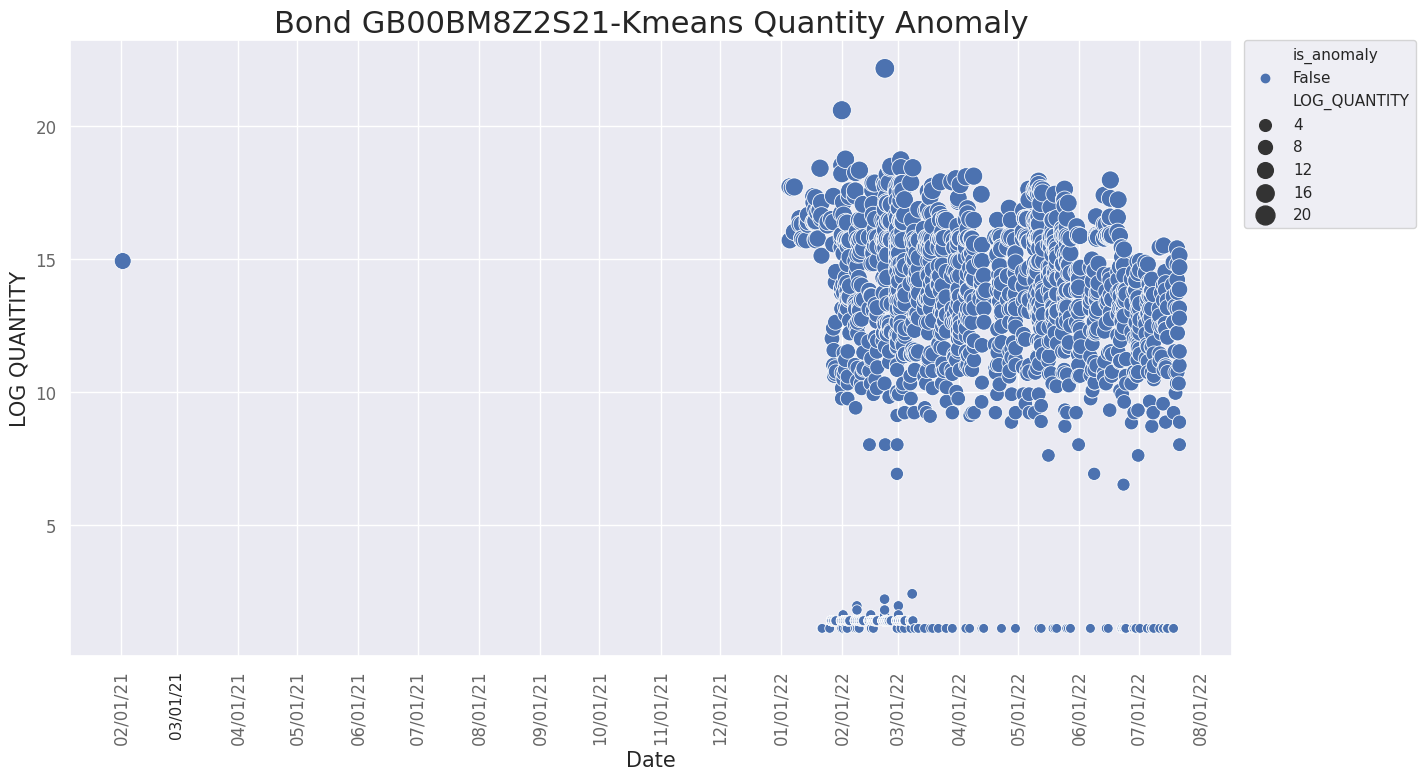

In [82]:
fig, ax = plt.subplots(figsize=(15,8))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('LOG QUANTITY', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
sns.set(style="darkgrid")
#g = sns.relplot(x="date", y="PRICE", kind="line", data=df)
sns.scatterplot(x='date', y='LOG_QUANTITY', data=df, hue='is_anomaly',size='LOG_QUANTITY',legend='brief',sizes=(50, 200))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='PRICE', color='is_anomaly')) + p9.geom_point(size=0.5)
plt.title('Bond GB00BM8Z2S21-Kmeans Quantity Anomaly',fontsize=22)

plt.show()

In [83]:
#GB00BYMWG366

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


[Text(0, 0, '113872'), Text(0, 0, '2331')]

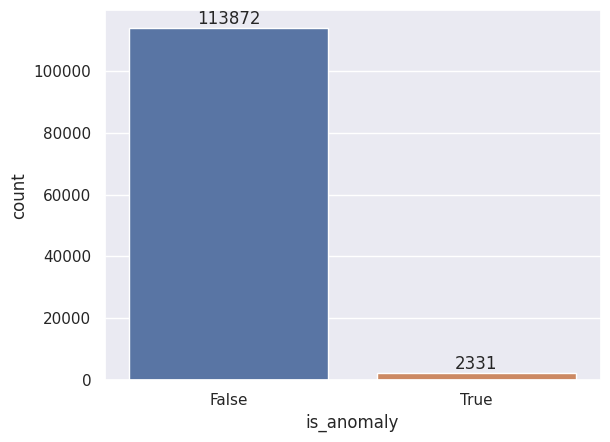

In [84]:
##Training data for price

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotnine as p9
import matplotlib.dates as mdates

# Import data
df = pd.read_csv('kmeans_results_t.csv')

ax=sns.countplot(df['is_anomaly'])
#df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-05-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-06-30')]
#df['is_anomaly'] = df['is_anomaly'].fillna('Not')


ax.bar_label(ax.containers[0])



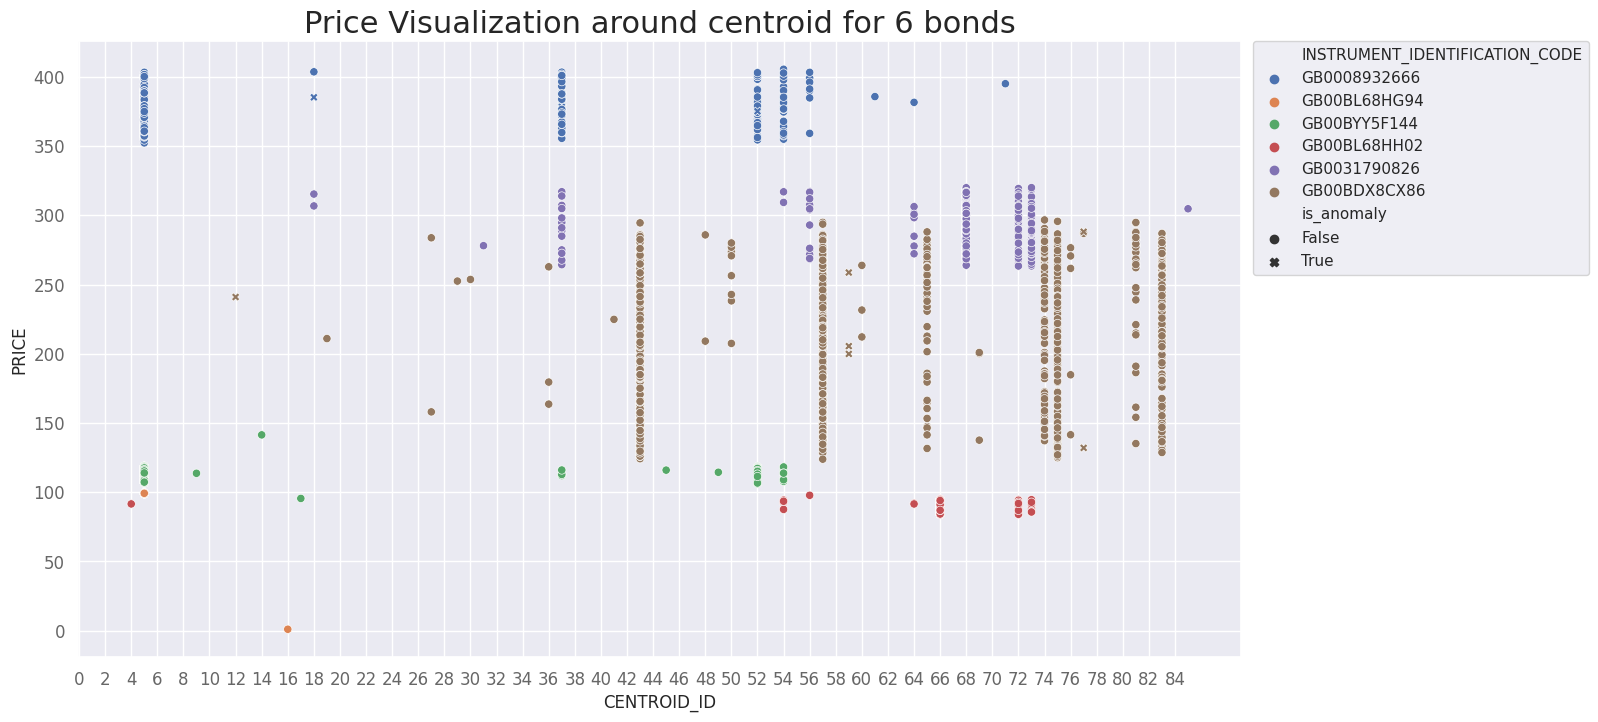

In [85]:
#Centroid Visualization
df2= df.loc[df['INSTRUMENT_IDENTIFICATION_CODE'].isin(['GB00BYY5F144','GB00BL68HH02','GB0008932666','GB0031790826','GB00BL68HG94','GB00BDX8CX86'])]
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=df2['CENTROID_ID'],y=df2['PRICE'],data=df2,hue=df2['INSTRUMENT_IDENTIFICATION_CODE'],style=df2['is_anomaly'],sizes=(100, 400))
plt.xticks(np.arange(0, 85, step=2))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
plt.title('Price Visualization around centroid for 6 bonds',fontsize=22)
plt.show()

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


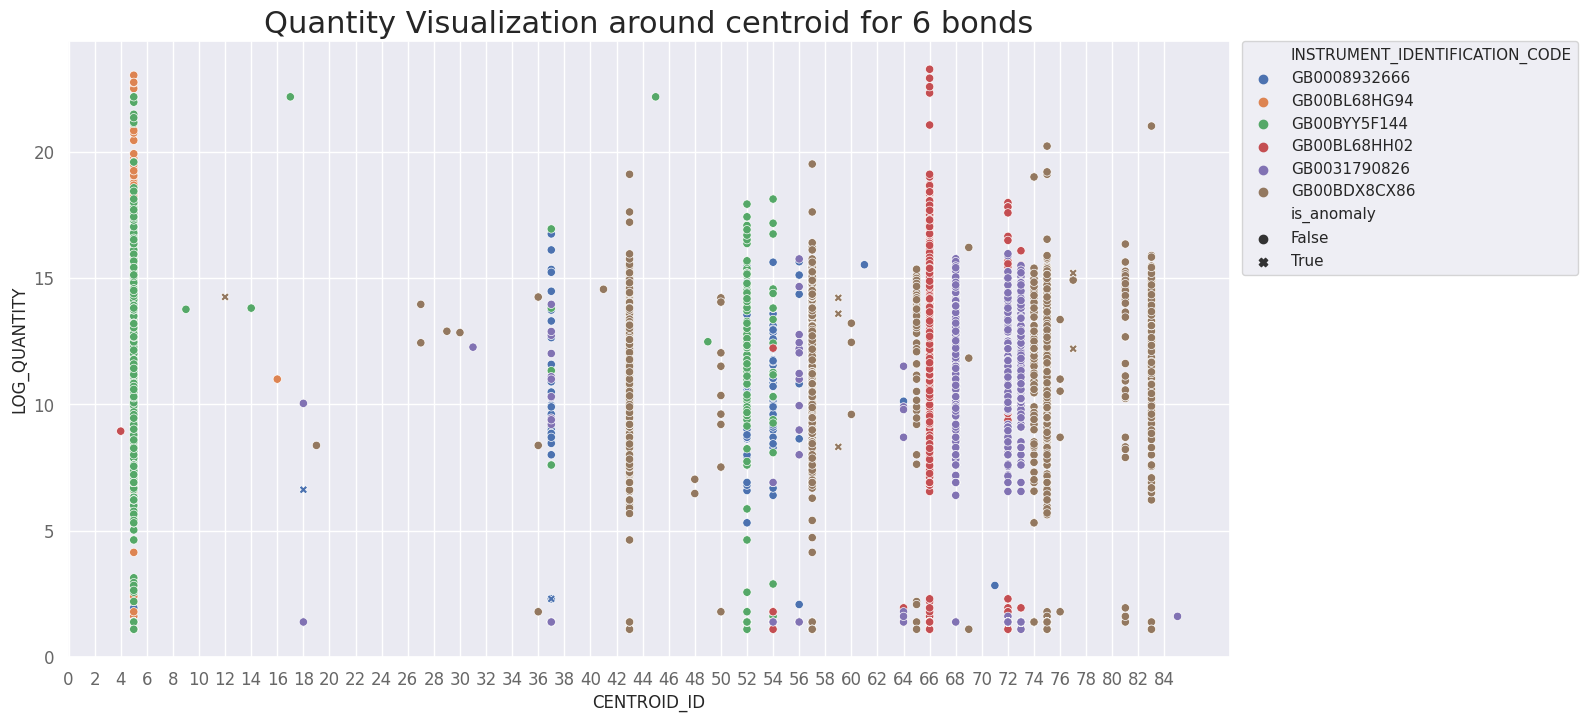

In [86]:
df2= df.loc[df['INSTRUMENT_IDENTIFICATION_CODE'].isin(['GB00BYY5F144','GB00BL68HH02','GB0008932666','GB0031790826','GB00BL68HG94','GB00BDX8CX86'])]
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(df2['CENTROID_ID'],df2['LOG_QUANTITY'],hue=df2['INSTRUMENT_IDENTIFICATION_CODE'],style=df2['is_anomaly'],legend='brief',sizes=(200, 400))
plt.xticks(np.arange(0, 85, step=2))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
plt.title('Quantity Visualization around centroid for 6 bonds',fontsize=22)
plt.show()

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Empty DataFrame
Columns: [is_anomaly, normalized_distance, CENTROID_ID, id, TRADING_DATE_AND_TIME, POST_TRADE_DATE_AND_TIME, INSTRUMENT_IDENTIFICATION_CODE, PRICE, VENUE_OF_EXECUTION, PRICE_NOTATION, PRICE_CURRENCY, VENUE_OF_PUBLICATION, TRANSACTION_IDENTIFICATION_CODE, QUANTITY, NOTIONAL_AMOUNT, NOTIONAL_CURRENCY, PUBLICATION_DATE_AND_TIME, IDAF, PRICE_DIFF, LOG_QUANTITY, date]
Index: []

[0 rows x 21 columns]

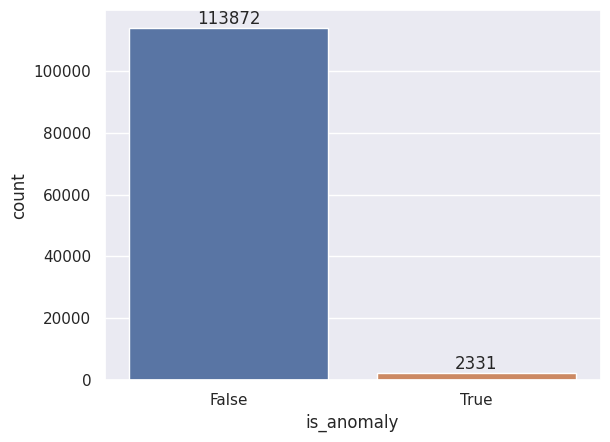

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotnine as p9
import matplotlib.dates as mdates

# Import data
df = pd.read_csv('kmeans_results_t.csv')

ax=sns.countplot(df['is_anomaly'])
#df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-05-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-06-30')]
#df['is_anomaly'] = df['is_anomaly'].fillna('Not')


ax.bar_label(ax.containers[0])
df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB00BJMHB534']
df['date'] = pd.to_datetime(df['POST_TRADE_DATE_AND_TIME'])
df = df.sort_values(by='date')

df1=df[df['is_anomaly'] ==True]
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.sort_values(by='date')
df1

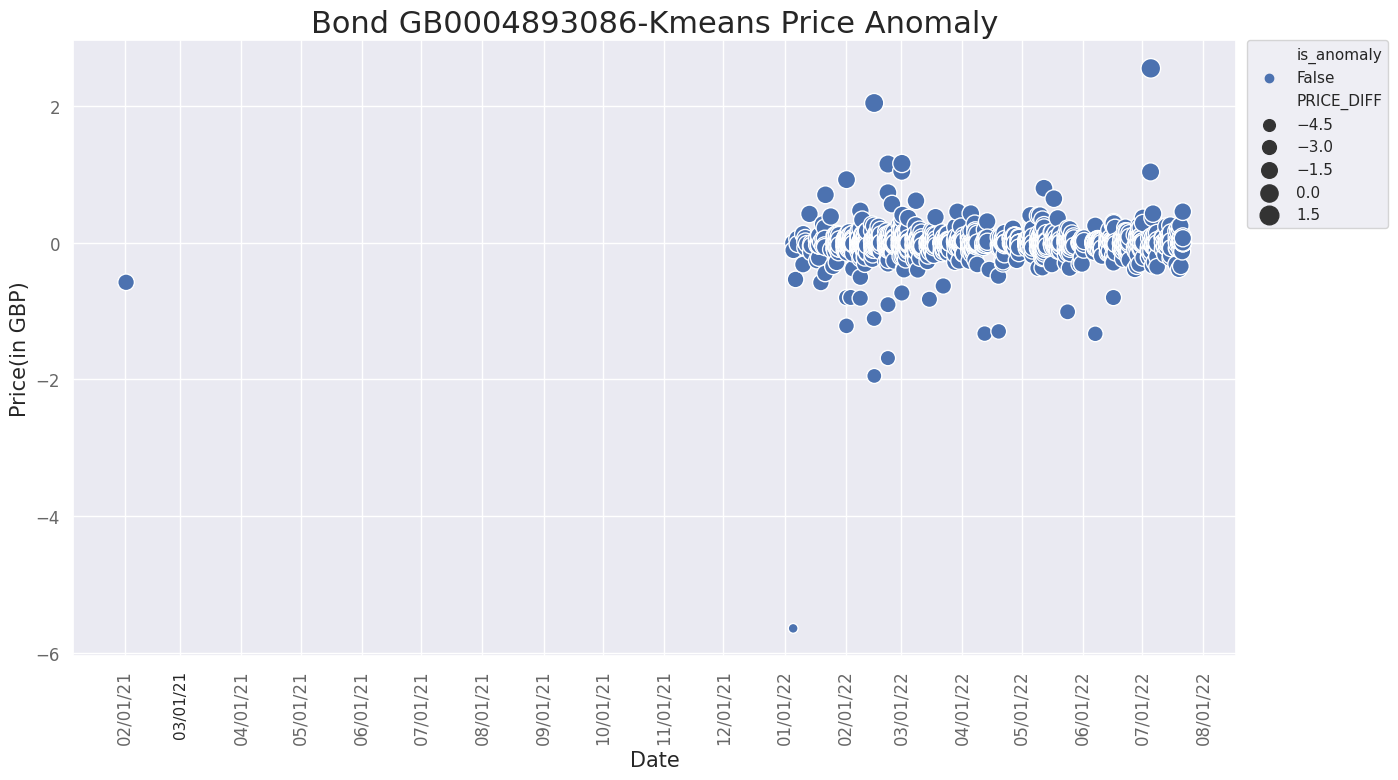

In [93]:
fig, ax = plt.subplots(figsize=(15,8))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price(in GBP)', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
sns.set(style="darkgrid")
#g = sns.relplot(x="date", y="PRICE", kind="line", data=df)
sns.scatterplot(x='date', y='PRICE_DIFF', data=df, hue='is_anomaly',size='PRICE_DIFF',legend='brief',sizes=(50, 200))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='PRICE', color='is_anomaly')) + p9.geom_point(size=0.5)
plt.title('Bond GB0004893086-Kmeans Price Anomaly',fontsize=22)

plt.show()

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log


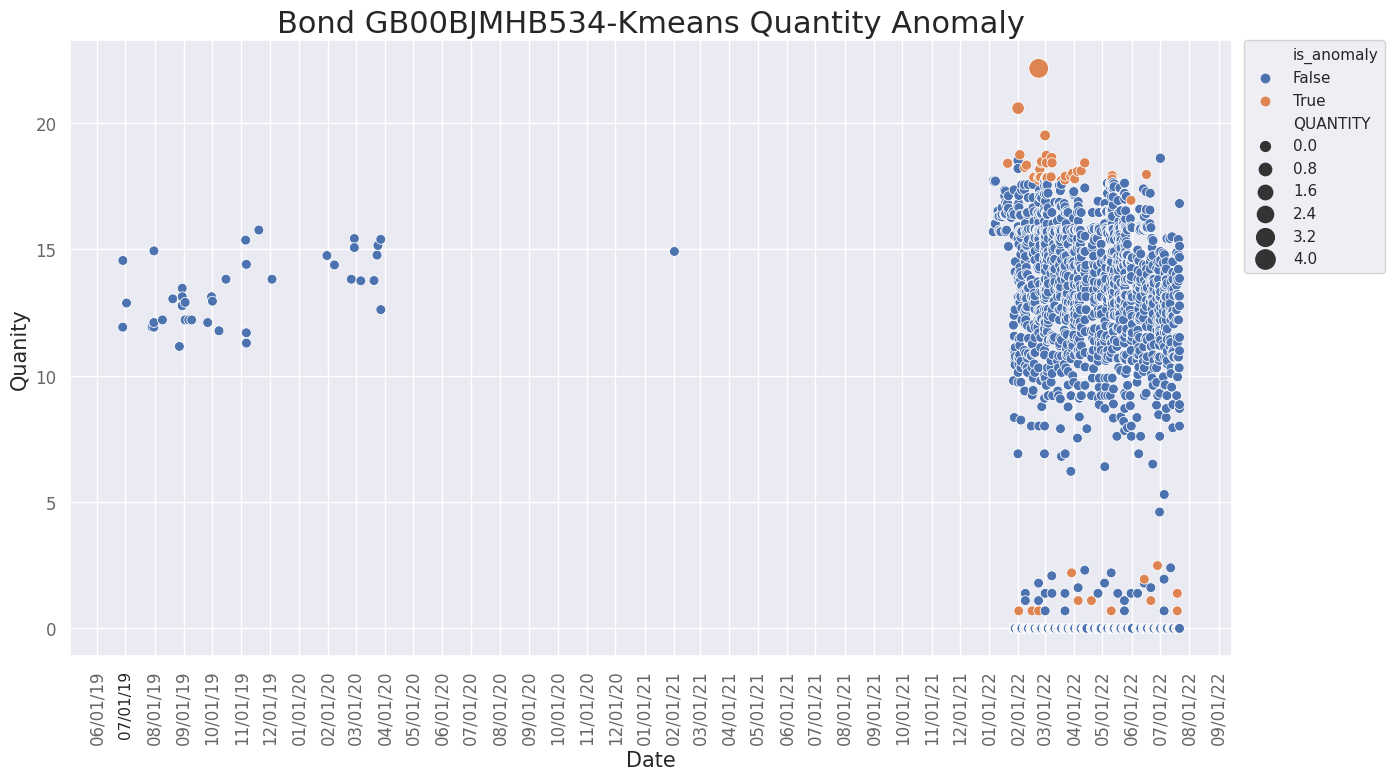

In [113]:
fig, ax = plt.subplots(figsize=(15,8))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Quanity', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
sns.set(style="darkgrid")
#g = sns.relplot(x="date", y="PRICE", kind="line", data=df)
sns.scatterplot(x='date', y=np.log(df['QUANTITY']), data=df, hue='is_anomaly',size='QUANTITY',legend='brief',sizes=(50, 200))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='PRICE', color='is_anomaly')) + p9.geom_point(size=0.5)
plt.title('Bond GB00BJMHB534-Kmeans Quantity Anomaly',fontsize=22)

plt.show()

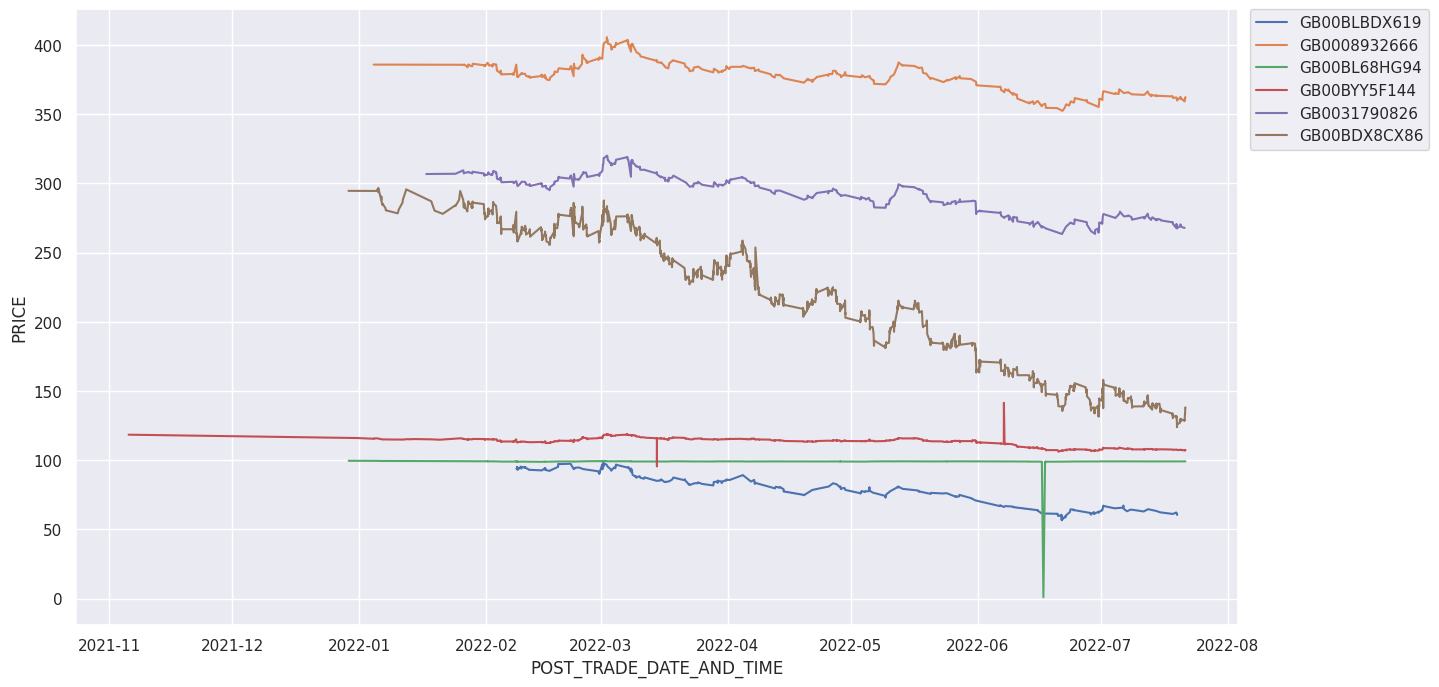

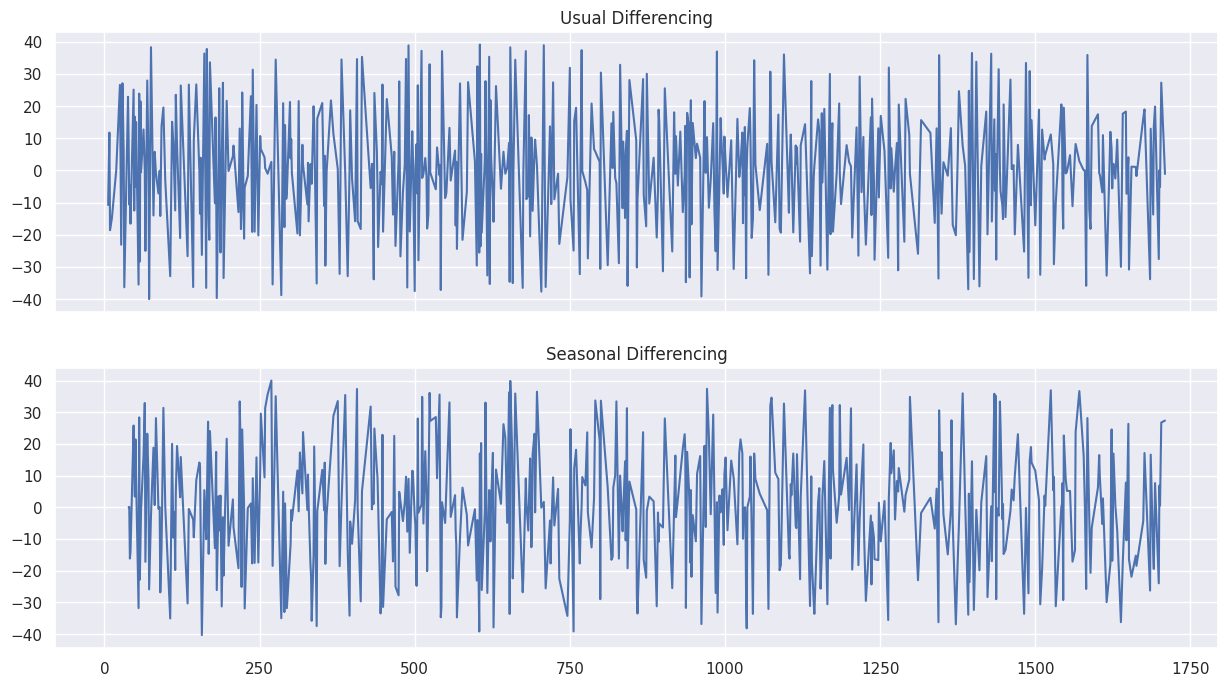

Augmented Dickey-Fuller Test on the Original Series
ADF Test Statistic : -24.557987503266038
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 564
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
Augmented Dickey-Fuller Test on the Seasonally Adjusted Series
ADF Test Statistic : -10.917712806351629
p-value : 1.057127557715532e-19
#Lags Used : 11
Number of Observations Used : 541
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the data
df2 = pd.read_csv('kmeans_results.csv')
df = pd.read_csv('kmeans_results.csv', parse_dates=['POST_TRADE_DATE_AND_TIME'])
df2= df.loc[df['INSTRUMENT_IDENTIFICATION_CODE'].isin(['GB00BYY5F144','GB00BLBDX619','GB0008932666','GB0031790826','GB00BL68HG94','GB00BDX8CX86'])]
fig, ax = plt.subplots(figsize=(15,8))

sns.lineplot(x=df['POST_TRADE_DATE_AND_TIME'],y=df2['PRICE'],data=df2,hue=df2['INSTRUMENT_IDENTIFICATION_CODE'],legend='brief')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB00BLBDX619']



# Plot

fig, axes = plt.subplots(2, 1, figsize=(15, 8), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df.PRICE.diff(1)); axes[0].set_title('Usual Differencing')
axes[0].grid(True)

# Seasonal Differencing
axes[1].plot(df.PRICE.diff(12)); axes[1].set_title('Seasonal Differencing')
axes[1].grid(True)

plt.show()

# ADF Test on the Original Series
result = adfuller(df.PRICE.dropna())
print('Augmented Dickey-Fuller Test on the Original Series')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

# ADF Test on the Seasonally Adjusted Series
result = adfuller(df.PRICE.diff(12).dropna())
print('Augmented Dickey-Fuller Test on the Seasonally Adjusted Series')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


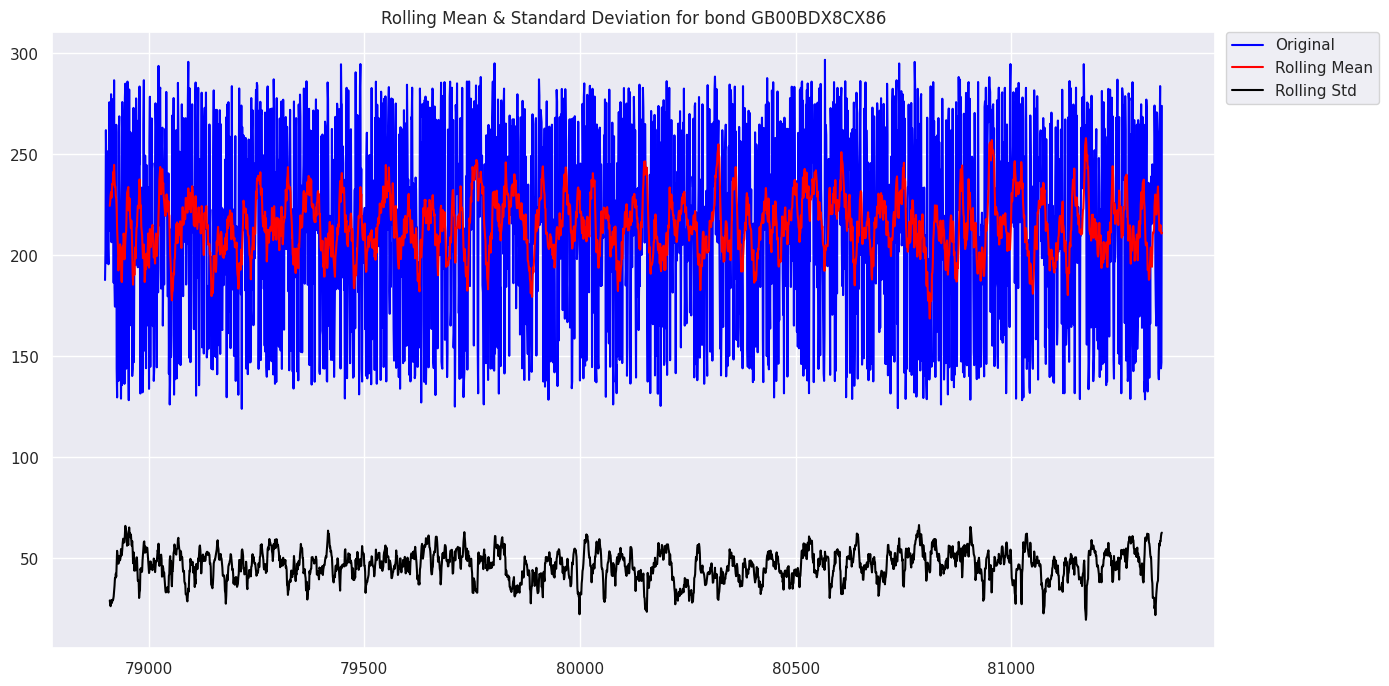

Results of Dickey-Fuller Test:
Test Statistic                  -27.980468
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    2448.000000
Critical Value (1%)              -3.433024
Critical Value (5%)              -2.862721
Critical Value (10%)             -2.567399
dtype: float64


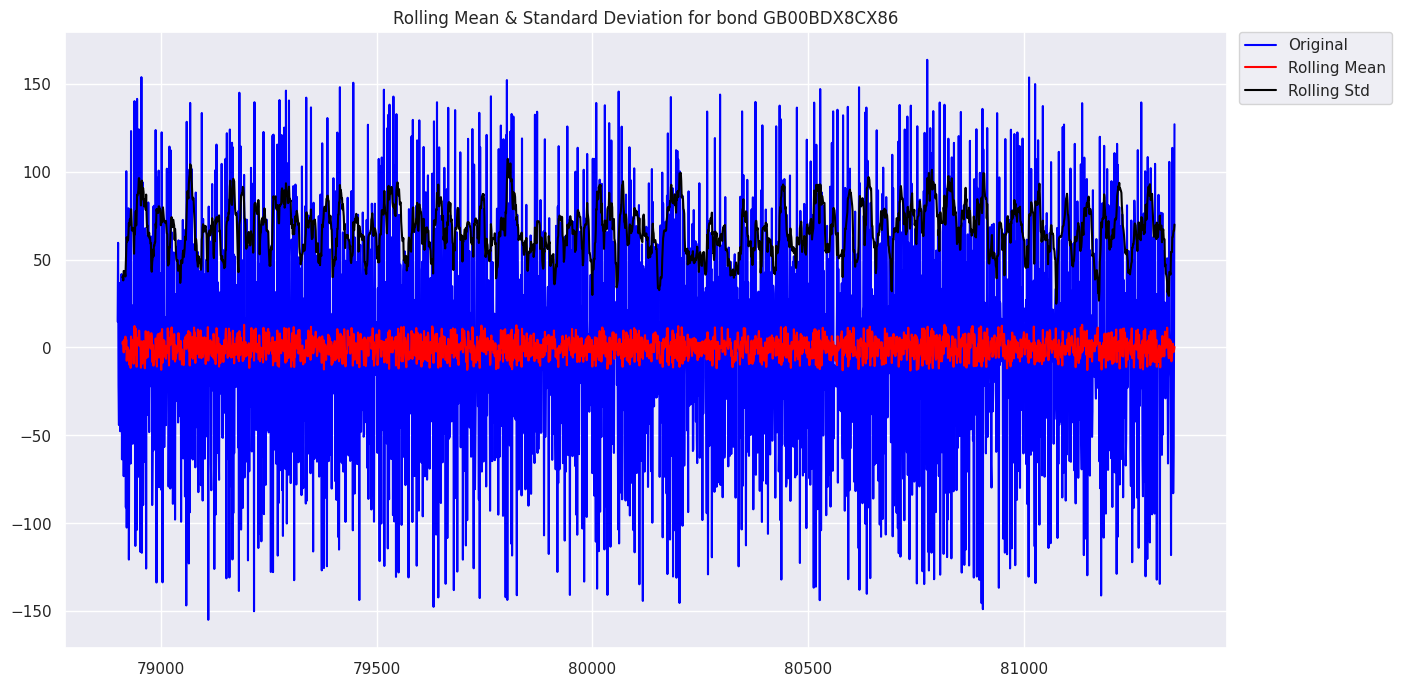

Results of Dickey-Fuller Test:
Test Statistic                -1.622104e+01
p-value                        3.897634e-29
#Lags Used                     2.500000e+01
Number of Observations Used    2.424000e+03
Critical Value (1%)           -3.433051e+00
Critical Value (5%)           -2.862733e+00
Critical Value (10%)          -2.567405e+00
dtype: float64


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

#Load a stock price data set
df = pd.read_csv('kmeans_results.csv',parse_dates=['POST_TRADE_DATE_AND_TIME'])
#df.set_index('POST_TRADE_DATE_AND_TIME', inplace=True)

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB00BDX8CX86']

#Identify if the data is stationary
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    fig, ax = plt.subplots(figsize=(15,8))
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation for bond GB00BDX8CX86')
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(df['PRICE'])

#Apply the differencing on price column
df['PRICE_DIFF'] = df['PRICE'] - df['PRICE'].shift(1)
df.head()

#Check if it is now stationary
test_stationarity(df['PRICE_DIFF'].dropna())

In [48]:
df

is_anomaly  normalized_distance  CENTROID_ID  id  \
78899       False             0.486334           83  77   
78900       False             1.237721           83  77   
78901       False             0.758839           44  77   
78902       False             0.606488           44  77   
78903       False             0.871143           83  77   
...           ...                  ...          ...  ..   
81345       False             1.626859           44  77   
81346       False             1.122377           83  77   
81347       False             1.301753           41  77   
81348       False             1.500743           41  77   
81349       False             1.216218           44  77   

            TRADING_DATE_AND_TIME         POST_TRADE_DATE_AND_TIME  \
78899  2022-05-06 14:18:27.775+00 2022-05-06 14:18:27.775000+00:00   
78900  2022-05-04 15:19:34.940+00 2022-05-04 15:19:34.940000+00:00   
78901  2022-02-28 16:49:56.442+00 2022-02-28 16:49:56.442000+00:00   
78902  2022-04-01 08:05:46.045+00 2022-04-01 08:05:46.045000+00:00   
78903  2022-05-11 12:15:03.774+00 2022-05-11 12:15:03.774000+00:00   
...                           ...                              ...   
81345  2022-01-24 12:14:27.501+00 2022-01-24 12:14:27.501000+00:00   
81346  2022-05-03 07:21:33.863+00 2022-05-03 07:21:33.863000+00:00   
81347  2022-07-06 14:46:27.004+00 2022-07-06 14:46:27.004000+00:00   
81348  2022-07-04 15:48:45.218+00 2022-07-04 15:48:45.218000+00:00   
81349  2022-02-18 13:54:45.333+00 2022-02-18 13:54:45.333000+00:00   

      INSTRUMENT_IDENTIFICATION_CODE    PRICE VENUE_OF_EXECUTION  \
78899                   GB00BDX8CX86  187.665               TREU   
78900                   GB00BDX8CX86  202.331               TREU   
78901                   GB00BDX8CX86  261.873               TREU   
78902                   GB00BDX8CX86  240.212               TREU   
78903                   GB00BDX8CX86  196.018               SINT   
...                              ...      ...                ...   
81345                   GB00BDX8CX86  283.700               TREU   
81346                   GB00BDX8CX86  200.695               TREU   
81347                   GB00BDX8CX86  143.901               TREU   
81348                   GB00BDX8CX86  146.889               TREU   
81349                   GB00BDX8CX86  273.905               TREU   

      PRICE_NOTATION PRICE_CURRENCY VENUE_OF_PUBLICATION  \
78899           PERC            GBP                 TREU   
78900           PERC            GBP                 TREU   
78901           PERC            GBP                 TREU   
78902           PERC            GBP                 TREU   
78903           PERC            GBP                 TREA   
...              ...            ...                  ...   
81345           PERC            GBP                 TREU   
81346           PERC            GBP                 TREU   
81347           PERC            GBP                 TREU   
81348           PERC            GBP                 TREU   
81349           PERC            GBP                 TREU   

      TRANSACTION_IDENTIFICATION_CODE   QUANTITY  NOTIONAL_AMOUNT  \
78899            '3605428369849582782   186195.0         186195.0   
78900            '7208338858071557087  3500000.0        3500000.0   
78901            '3605354702570523212   138000.0         138000.0   
78902            '3605389886942609751      100.0            100.0   
78903            '3605433867407721863   785000.0         785000.0   
...                               ...        ...              ...   
81345            '7208228906908778727  3092000.0        3092000.0   
81346            '3605425071314698520  2500000.0        2500000.0   
81347            '3605495440058877027     6730.0           6730.0   
81348            '3605493241035621623   187000.0         187000.0   
81349            '3605343707454243741  2277000.0        2277000.0   

      NOTIONAL_CURRENCY PUBLICATION_DATE_AND_TIME   IDAF  PRICE_DIFF  
78899              

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

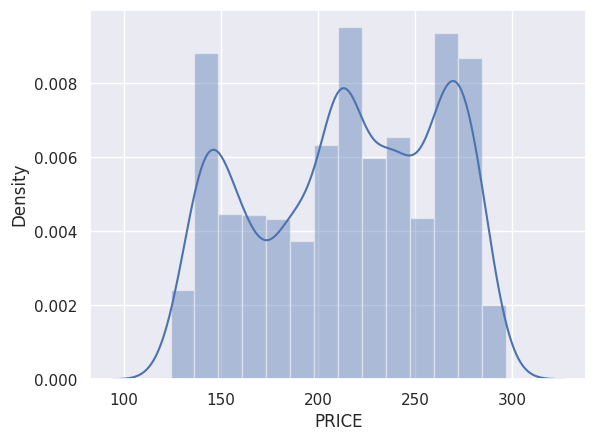

In [49]:
sns.distplot(df['PRICE'])

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='PRICE_DIFF', ylabel='Density'>

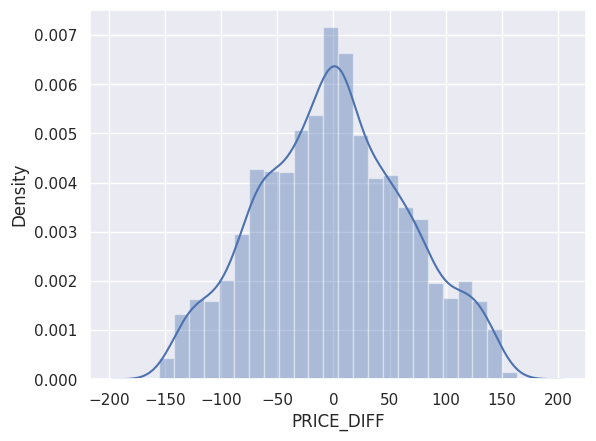

In [50]:
sns.distplot(df['PRICE_DIFF'])

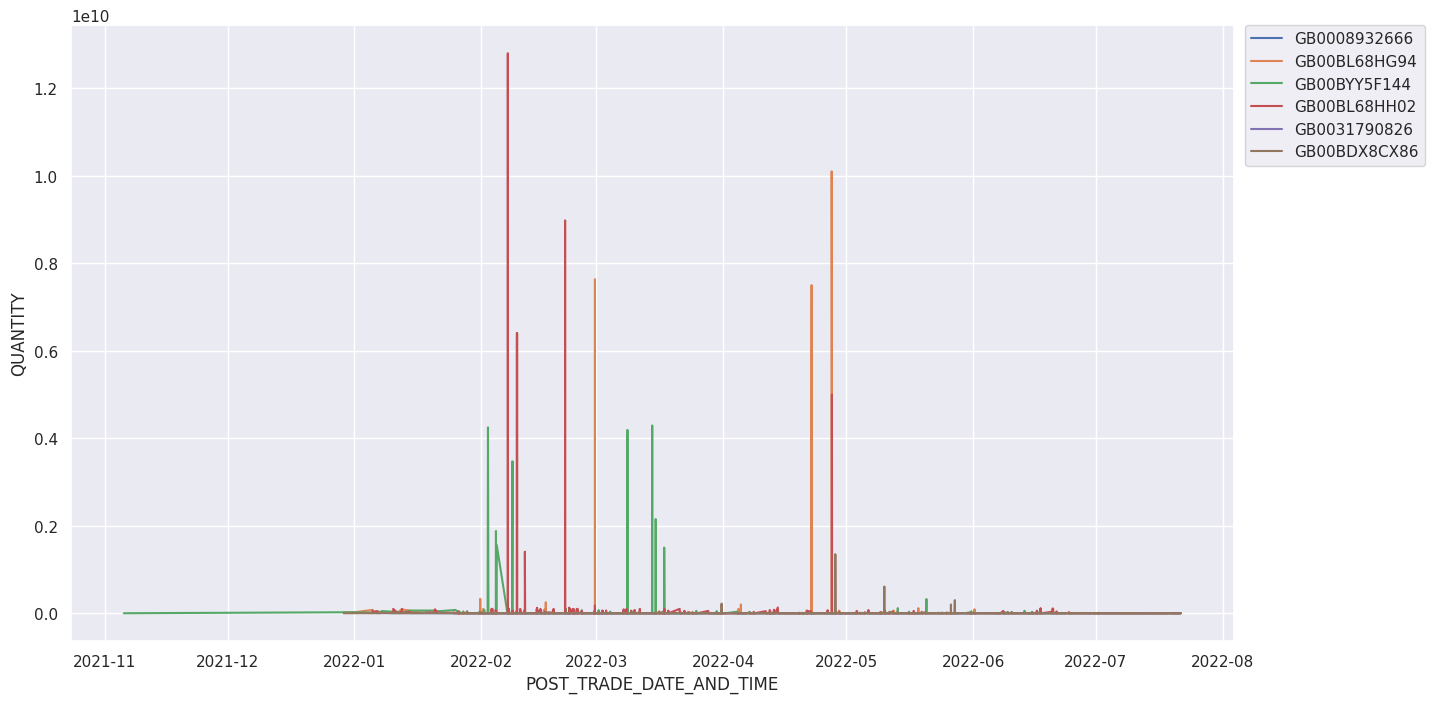

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the data
df2 = pd.read_csv('kmeans_results.csv')
df = pd.read_csv('kmeans_results.csv', parse_dates=['POST_TRADE_DATE_AND_TIME'])
df2= df.loc[df['INSTRUMENT_IDENTIFICATION_CODE'].isin(['GB00BYY5F144','GB00BL68HH02','GB0008932666','GB0031790826','GB00BL68HG94','GB00BDX8CX86'])]
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x=df['POST_TRADE_DATE_AND_TIME'],y=df2['QUANTITY'],data=df2,hue=df2['INSTRUMENT_IDENTIFICATION_CODE'],legend='brief')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
/tmp/ipykernel_267/364424039.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


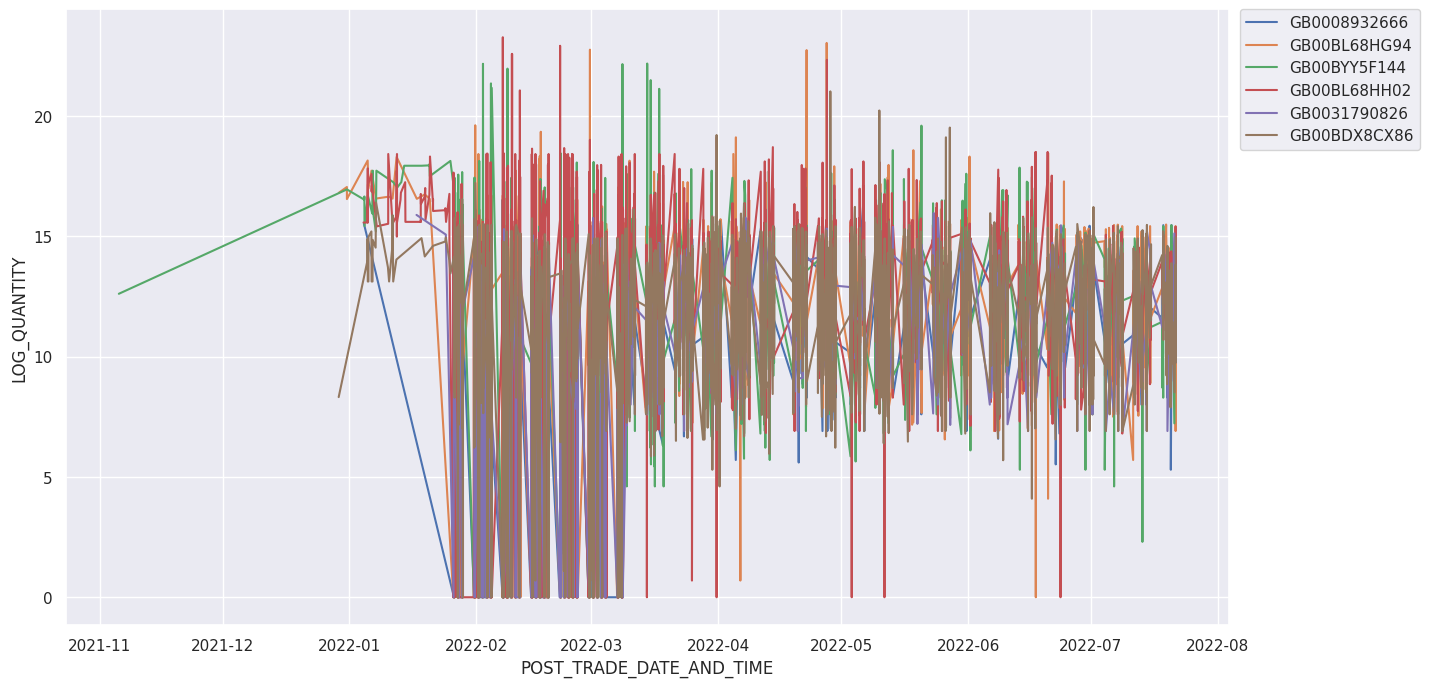

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load the data
df2 = pd.read_csv('kmeans_results.csv')
df = pd.read_csv('kmeans_results.csv', parse_dates=['POST_TRADE_DATE_AND_TIME'])
df2= df.loc[df['INSTRUMENT_IDENTIFICATION_CODE'].isin(['GB00BYY5F144','GB00BL68HH02','GB0008932666','GB0031790826','GB00BL68HG94','GB00BDX8CX86'])]
fig, ax = plt.subplots(figsize=(15,8))
df2['LOG_QUANTITY'] = np.log(df2['QUANTITY'])
df.head()

sns.lineplot(x=df['POST_TRADE_DATE_AND_TIME'],y=df2['LOG_QUANTITY'],data=df2,hue=df2['INSTRUMENT_IDENTIFICATION_CODE'],legend='brief')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)


In [53]:
#df['centroid'] = df.groupby('cluster')['cluster'].transform('count')

# Create price column
#df['price'] = df['price'].astype(float)

# Create quantity column
#df['quantity'] = df['quantity'].astype(float)

# Visualize price data around the centroid data


In [54]:
#Visualize the centroids

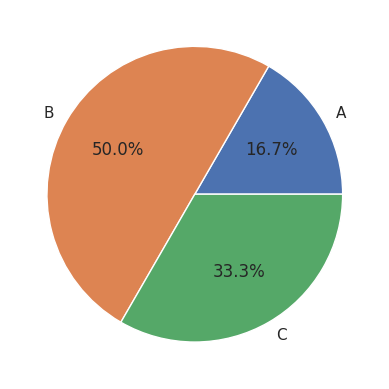

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Create a dataframe
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})

# Create a pie chart
plt.pie(df['val'], labels=df['lab'], autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='A', ylabel='count'>

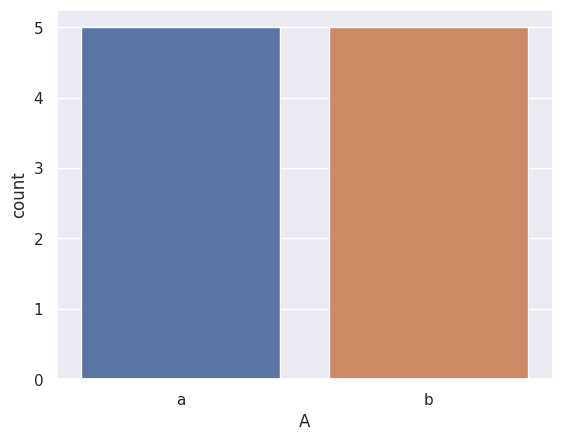

In [56]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'A': ['a', 'a', 'b', 'b', 'a', 'b', 'a', 'b', 'a', 'b'],
                   'B': ['c', 'd', 'c', 'd', 'c', 'd', 'c', 'd', 'c', 'd']})

sns.countplot(x='A', data=df)

In [57]:
##Autoencoders extended

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


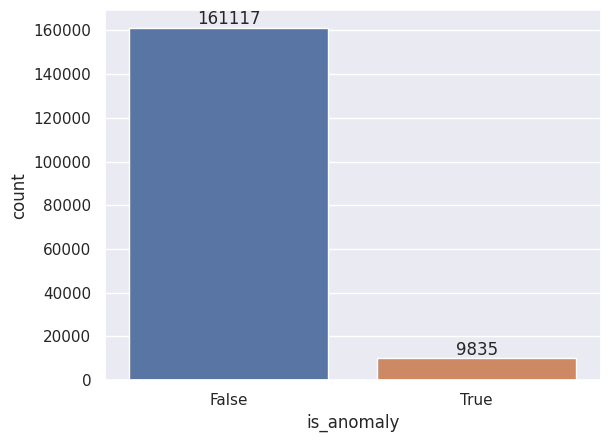

In [58]:
## Auto Encoder Data   1st Bond selected GB0004893086

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotnine as p9
import matplotlib.dates as mdates

# Import data
df = pd.read_csv('autoencoders_results_t.csv')
ax=sns.countplot(df['is_anomaly'])

#df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-01-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-02-28')]



ax.bar_label(ax.containers[0])
df['Anomaly_Type'] = df['Anomaly_Type'].fillna('Not')

In [59]:
# Visualize the autoencoders data with no segment for one bond

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB0004893086']
df['date'] = pd.to_datetime(df['POST_TRADE_DATE_AND_TIME'])
df = df.sort_values(by='POST_TRADE_DATE_AND_TIME')

df1=df[df['is_anomaly'] ==True]
df1['date'] = pd.to_datetime(df1['POST_TRADE_DATE_AND_TIME'])
df1 = df1.sort_values(by='POST_TRADE_DATE_AND_TIME')

#df1
#print(df.tail())

/tmp/ipykernel_267/408578438.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


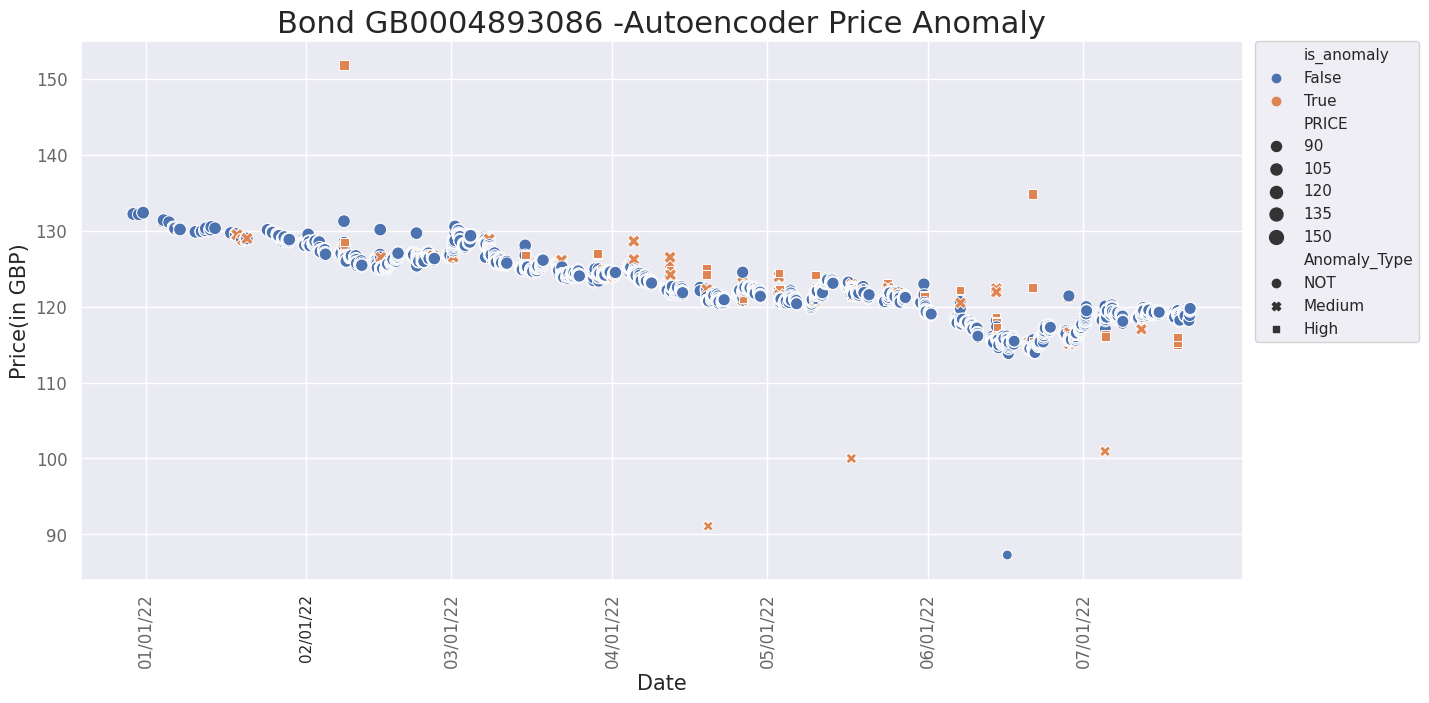

In [60]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price(in GBP)', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
sns.set(style="darkgrid")
#g = sns.relplot(x="date", y="PRICE", kind="line", data=df4
sns.scatterplot(x='date', y='PRICE', data=df, hue='is_anomaly',size='PRICE',style='Anomaly_Type',legend='brief',sizes=(50, 100))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='PRICE', color='is_anomaly')) + p9.geom_point(size=0.5)
plt.title('Bond GB0004893086 -Autoencoder Price Anomaly',fontsize=22)

plt.show()

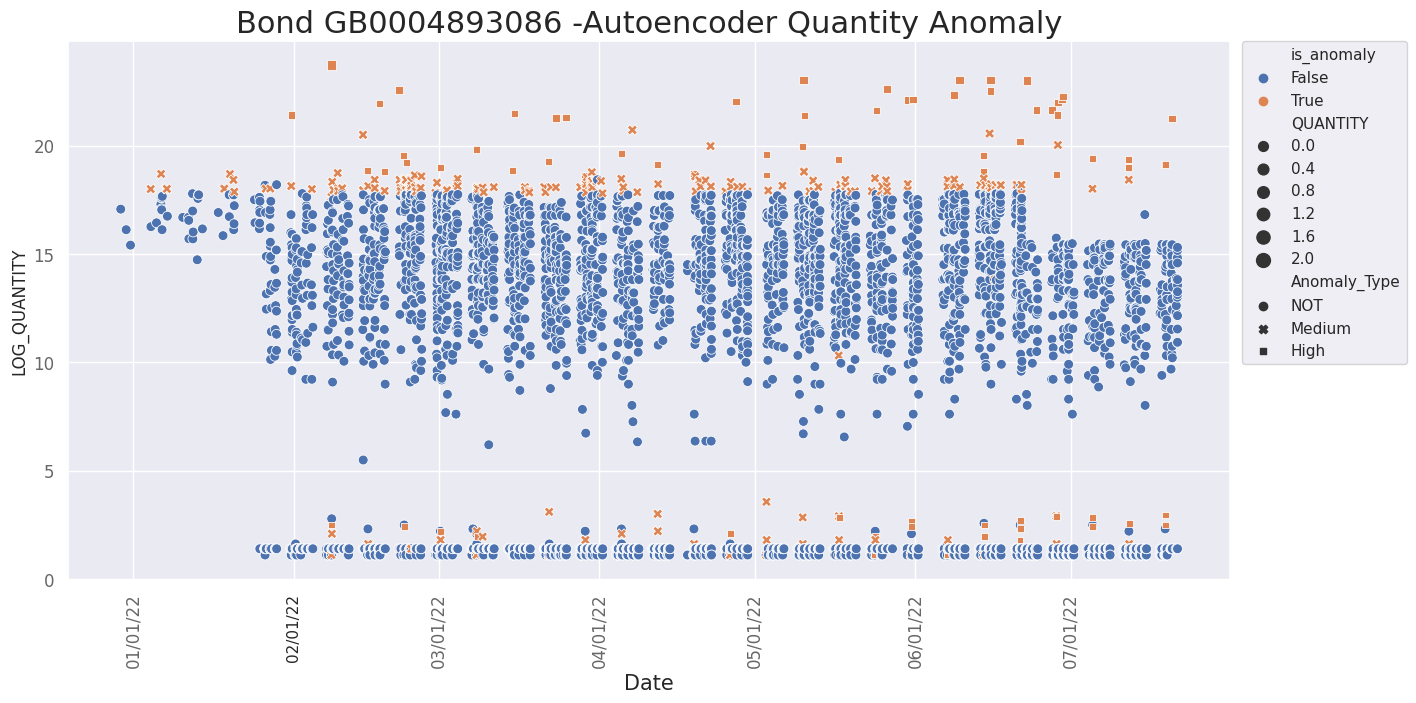

In [61]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date', fontsize=15)
plt.yticks(fontsize=12, alpha=.7)
plt.xticks(fontsize=12, alpha=.7)
#sns.set(style="whitegrid")
plt.title('Bond GB0004893086 -Autoencoder Quantity Anomaly',fontsize=22)
sns.set(style="darkgrid")
sns.scatterplot(x='date', y='LOG_QUANTITY', data=df, hue='is_anomaly',size='QUANTITY',style='Anomaly_Type',legend='brief',sizes=(50, 100))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

plt.show()


<AxesSubplot:>

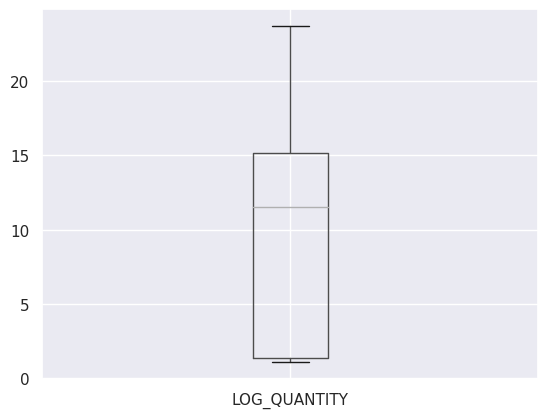

In [62]:
#sns.distplot(df['QUANTITY'])
plt.ticklabel_format(style='plain', axis='y')
df.boxplot(column='LOG_QUANTITY')

<AxesSubplot:>

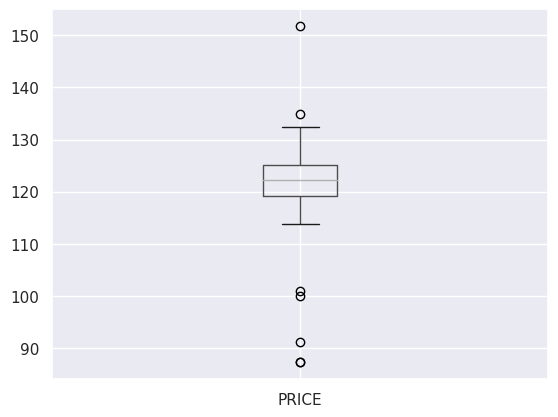

In [63]:
#sns.distplot(df['QUANTITY'])
plt.ticklabel_format(style='plain', axis='y')
df.boxplot(column='PRICE')

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'Quantity (Distribution for Bond GB0004893086) ')

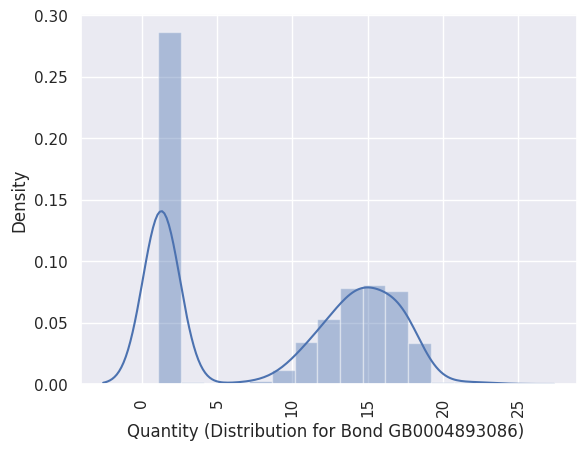

In [64]:
##Visualization of the quantity distribution
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
sns.distplot(df['LOG_QUANTITY'])
plt.xlabel('Quantity (Distribution for Bond GB0004893086) ', fontsize=12)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 0, 'PRICE (Distribution for Bond GB0004893086) ')

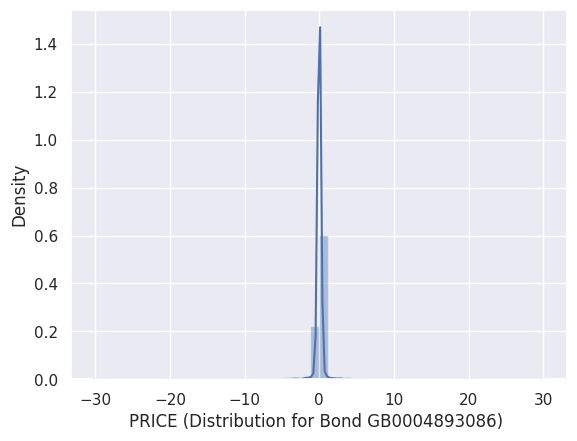

In [65]:
sns.distplot(df['PRICE_DIFF'])
plt.xlabel('PRICE (Distribution for Bond GB0004893086) ', fontsize=12)

In [66]:
## 2nd Bond Selected ## Auto Encoder Data   Bond selected GB0008932666

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates

# Import data
df = pd.read_csv('autoencoders_results_t.csv')
#df = df[(df['POST_TRADE_DATE_AND_TIME'] >= '2022-02-01') & (df['POST_TRADE_DATE_AND_TIME'] <= '2022-03-31')]
df['Anomaly_Type'] = df['Anomaly_Type'].fillna('Not')

In [67]:
# Visualize the data with  for one bond

df = df[df['INSTRUMENT_IDENTIFICATION_CODE'] == 'GB00BMGR2809'] ##GB0008932666  GB00B00NY175
df['date'] = pd.to_datetime(df['POST_TRADE_DATE_AND_TIME'])
df = df.sort_values(by='POST_TRADE_DATE_AND_TIME')

df1=df[df['is_anomaly'] ==True]
df1['date'] = pd.to_datetime(df1['POST_TRADE_DATE_AND_TIME'])
df1 = df1.sort_values(by='POST_TRADE_DATE_AND_TIME')


/tmp/ipykernel_267/411281828.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


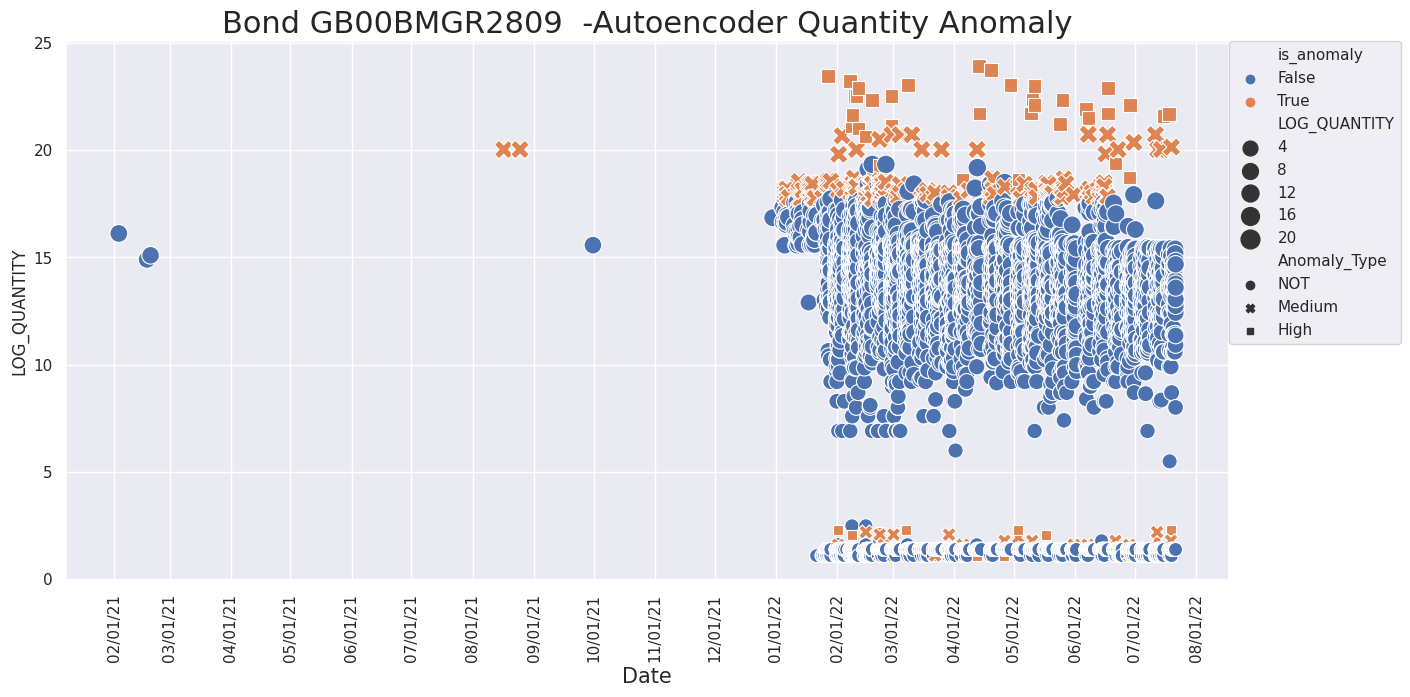

In [68]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
plt.xlabel('Date', fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.title('Bond GB00BMGR2809  -Autoencoder Quantity Anomaly',fontsize=22)
sns.scatterplot(x='date', y='LOG_QUANTITY', data=df, hue='is_anomaly',size='LOG_QUANTITY',style='Anomaly_Type',legend='brief',sizes=(100, 200))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='QUANTITY', color='is_anomaly')) + p9.geom_point(size=0.5)

plt.show()

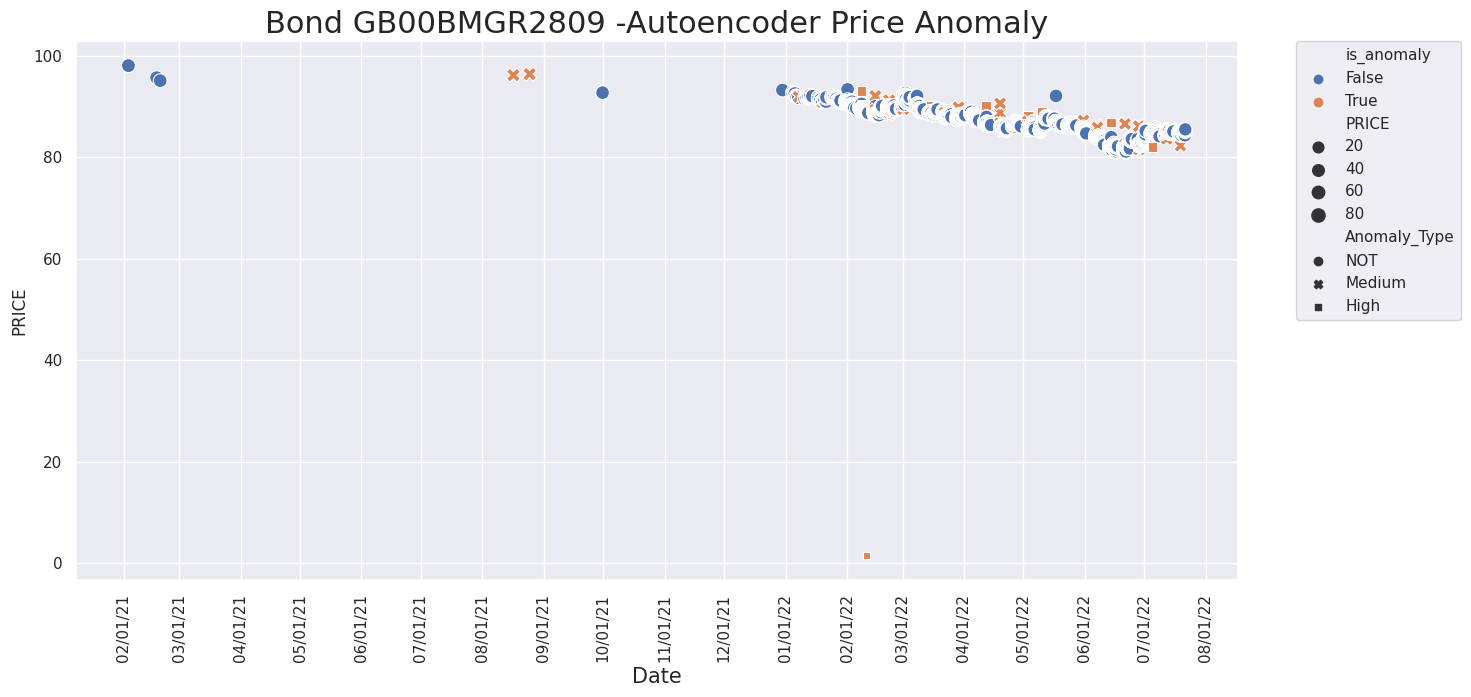

In [69]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(df['date'], df['PRICE'])
plt.xlabel('Date', fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax.xaxis.set_tick_params(rotation=90)
plt.title('Bond GB00BMGR2809 -Autoencoder Price Anomaly',fontsize=22)
sns.scatterplot(x='date', y='PRICE', data=df, hue='is_anomaly',size='PRICE',style='Anomaly_Type',legend='brief',sizes=(50, 100))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#p9.ggplot(df, p9.aes(x='date', y='QUANTITY', color='is_anomaly')) + p9.geom_point(size=0.5)

plt.show()